# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.__version__

'2.0.3'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/stock_data.csv')

In [ ]:
df = data.copy()

In [ ]:
df.columns = [c.replace(" ", "_") for c in df.columns]

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

Ticker_Symbol                 Security             GICS_Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS_Sub_Industry  Current_Price  Price_Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [ ]:
df.tail()

Ticker_Symbol                Security             GICS_Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS_Sub_Industry  Current_Price  Price_Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

In [ ]:
df.shape

(340, 15)

There are 340 rows and 15 columns in the dataset.

In [ ]:
df.describe(include = 'all').T

count unique  \
Ticker_Symbol                   340    340   
Security                        340    340   
GICS_Sector                     340     11   
GICS_Sub_Industry               340    104   
Current_Price                 340.0    NaN   
Price_Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash_Ratio                    340.0    NaN   
Net_Cash_Flow                 340.0    NaN   
Net_Income                    340.0    NaN   
Earnings_Per_Share            340.0    NaN   
Estimated_Shares_Outstanding  340.0    NaN   
P/E_Ratio                     340.0    NaN   
P/B_Ratio                     340.0    NaN   

                                                             top freq  \
Ticker_Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS_Sector                                          Industrials   53   
GICS_Sub_Industry             Oil & Gas Exploration & Production   16   
Current_Price                                                NaN  NaN   
Price_Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash_Ratio                                                   NaN  NaN   
Net_Cash_Flow                                                NaN  NaN   
Net_Income                                                   NaN  NaN   
Earnings_Per_Share                                           NaN  NaN   
Estimated_Shares_Outstanding                                 NaN  NaN   
P/E_Ratio                                                    NaN  NaN   
P/B_Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker_Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS_Sector                                 NaN                NaN   
GICS_Sub_Industry                           NaN                NaN   
Current_Price                         80.862345          98.055086   
Price_Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash_Ratio                            70.023529          90.421331   
Net_Cash_Flow                   55537620.588235  1946365312.175789   
Net_Income                    1494384602.941176  3940150279.327936   
Earnings_Per_Share                     2.776662           6.587779   
Estimated_Shares_Outstanding    577028337.75403   845849595.417695   
P/E_Ratio                             32.612563          44.348731   
P/B_Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker_Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS_Sector                             NaN          NaN          NaN   
GICS_Sub_Industry                       NaN          NaN          NaN   
Current_Price                           4.5       38.555       59.705   
Price_Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash_Ratio                              0.0         18.0         47.0   
Net_Cash_Flow                -11208000000.0 -193906500.0    2098000.0   
Net_Income                   -23528000000.0  352301250.0  707336000.0   
Earnings_Per_Share                    -61.2       1.5575        2.895   
Estimated_Shares_Outstanding    27672156.86  158848216

*   Columns Ticker_Symbol and Security have unique rows.
*   GICS_Sector have 11 unique values. 15.5% of the records are from Industrials.
*   GICS_Sub_Industry have 104 unique values. Oil and Gas Exploration and Production have highest frequency.
*   The avg Current_Price is 80.8 dollars. It ranges rom 4.5 to 1274.9 dollars.
*   The avg Price_Change is 4% and the median Price_Change is 4.8%
*   The avg ROE is 39.5 and the median is 15. The avg and the median Earnings_Per_Share values are 2.7 and 2.8 respectively.
*   The P/E_Ratio  ranges from 2.9 to 528
*   The P/B_Ratio ranges from -76.1 to 129

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

There are 4 Categorical columns and 11 Numerical columns.

In [ ]:
df.isnull().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

There are no missing rows in the dataset.

In [ ]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

## Exploratory Data Analysis (EDA)

###Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

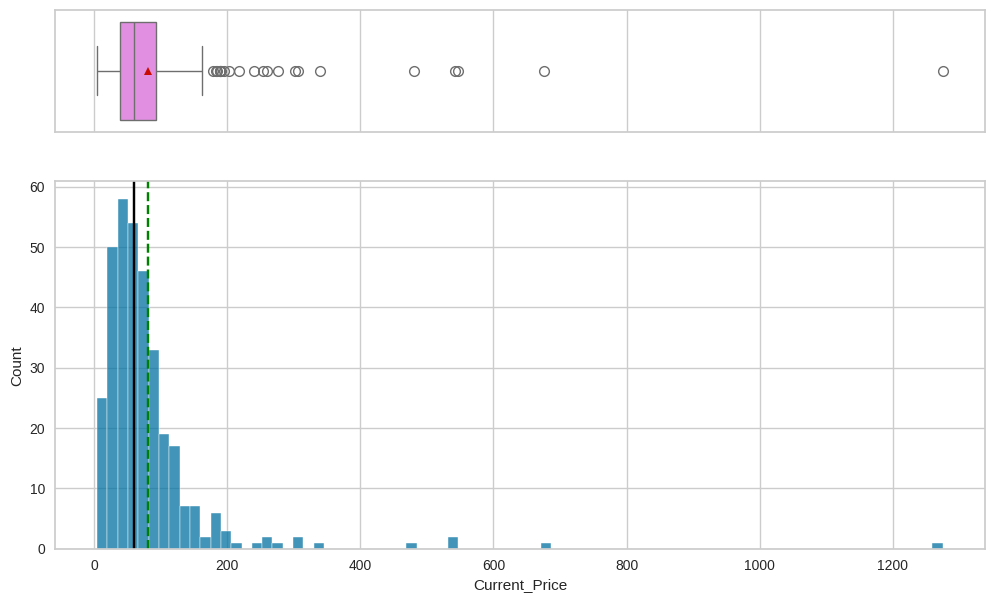

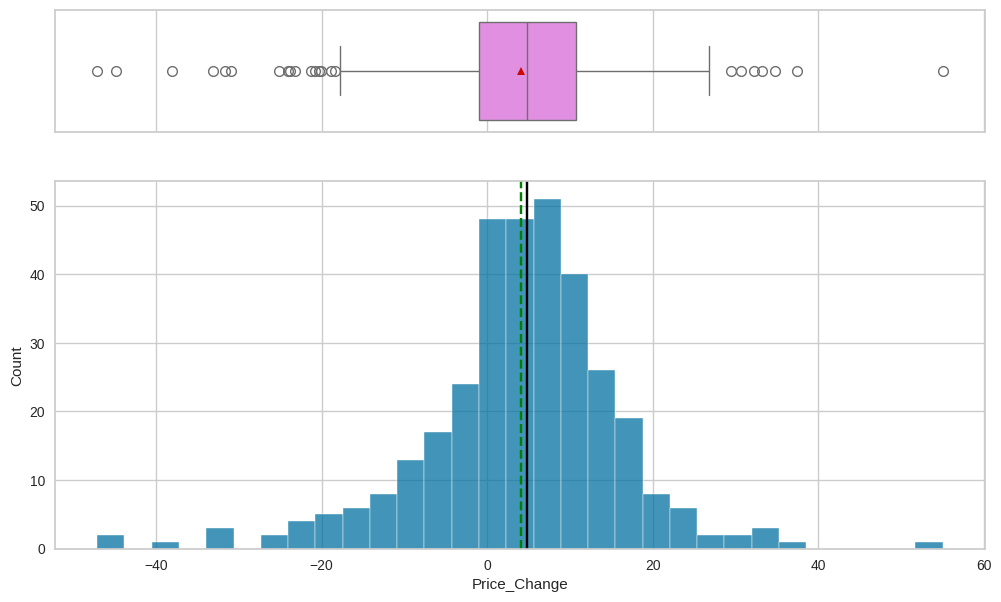

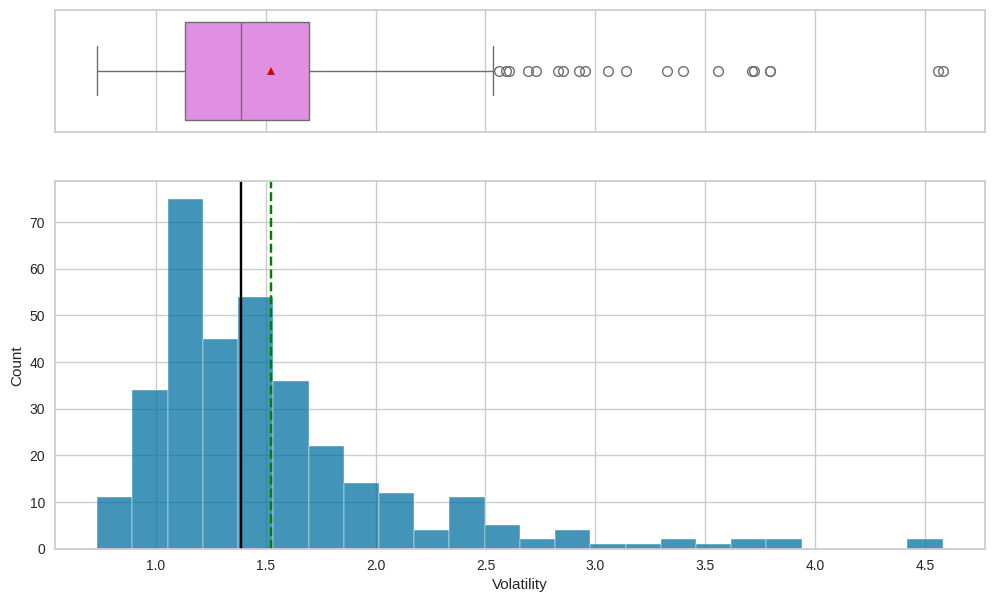

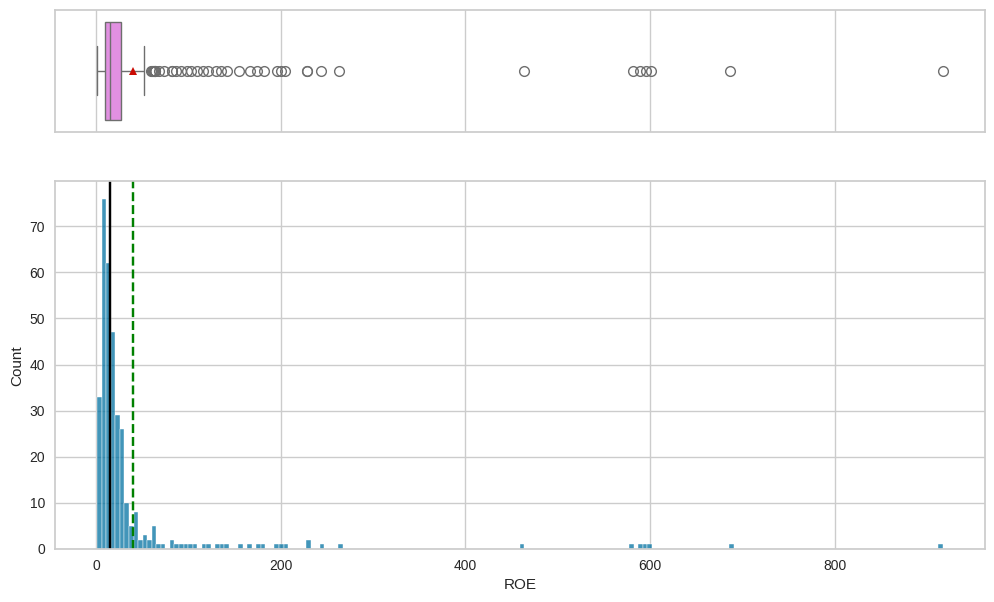

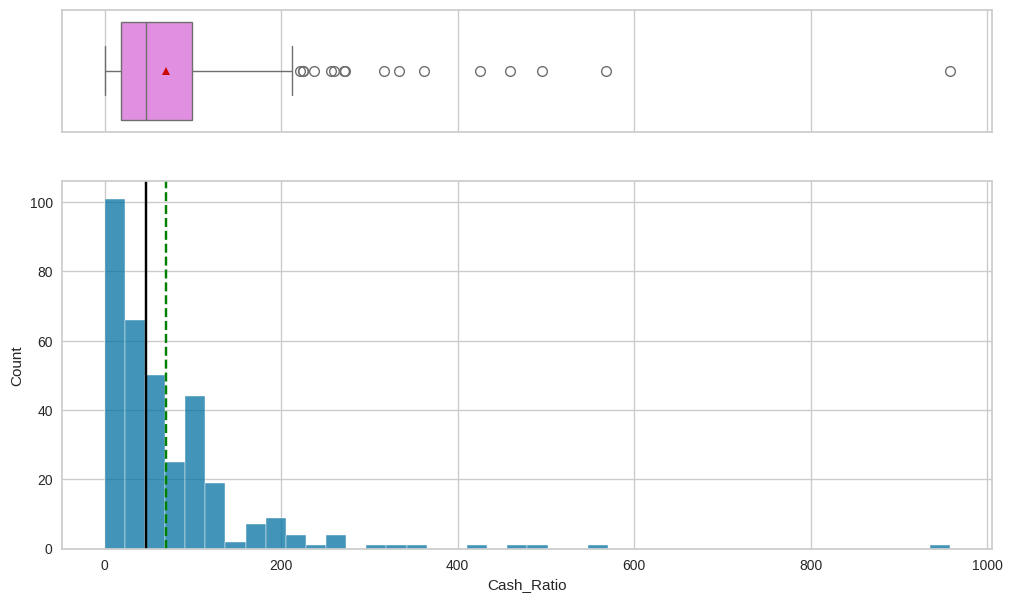

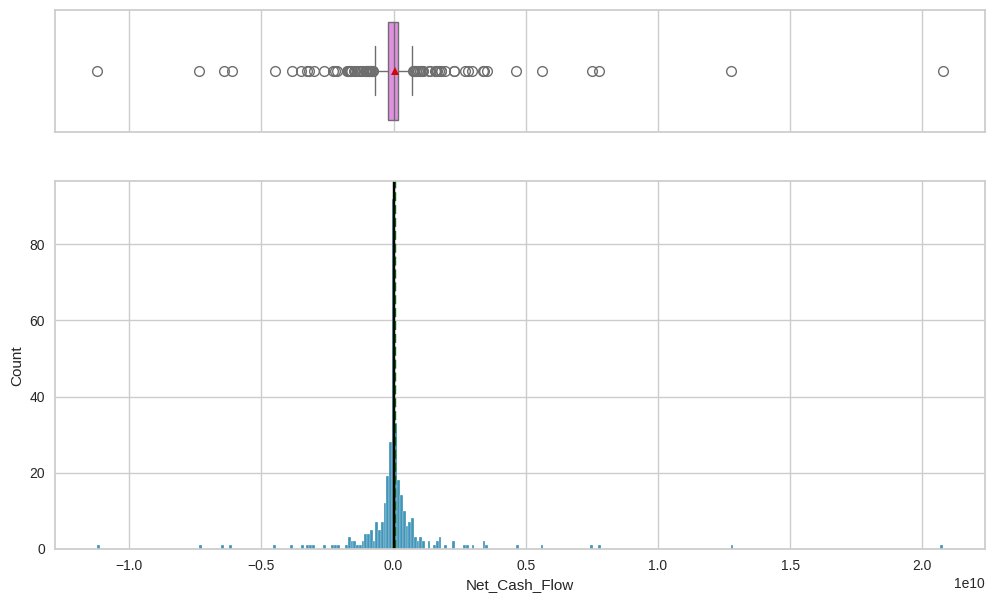

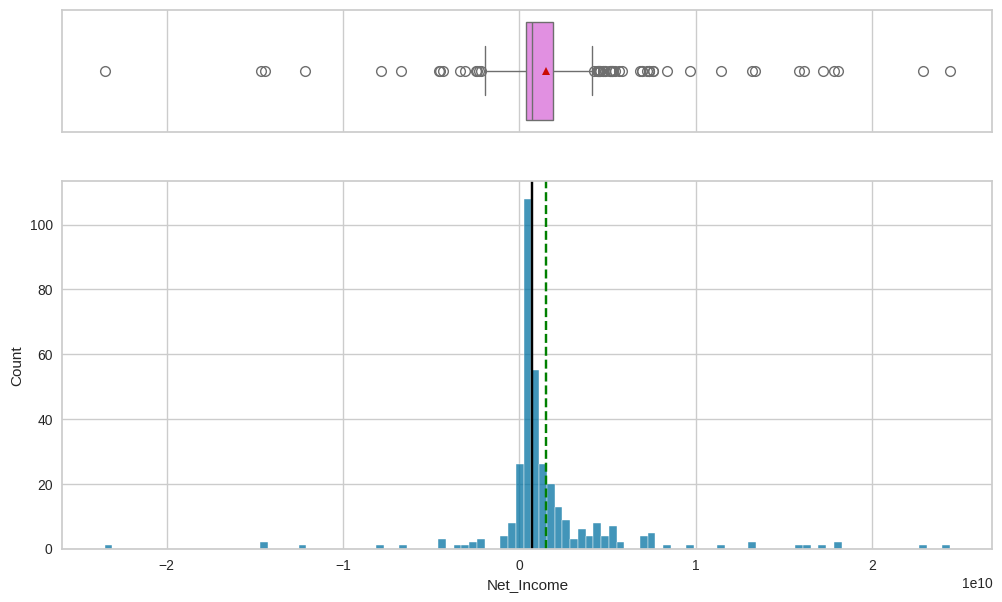

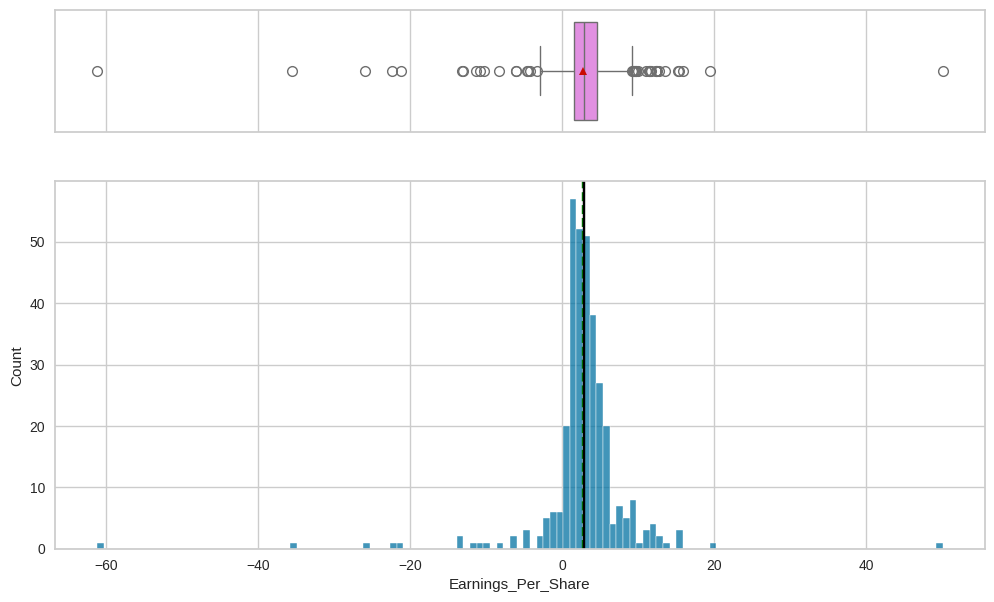

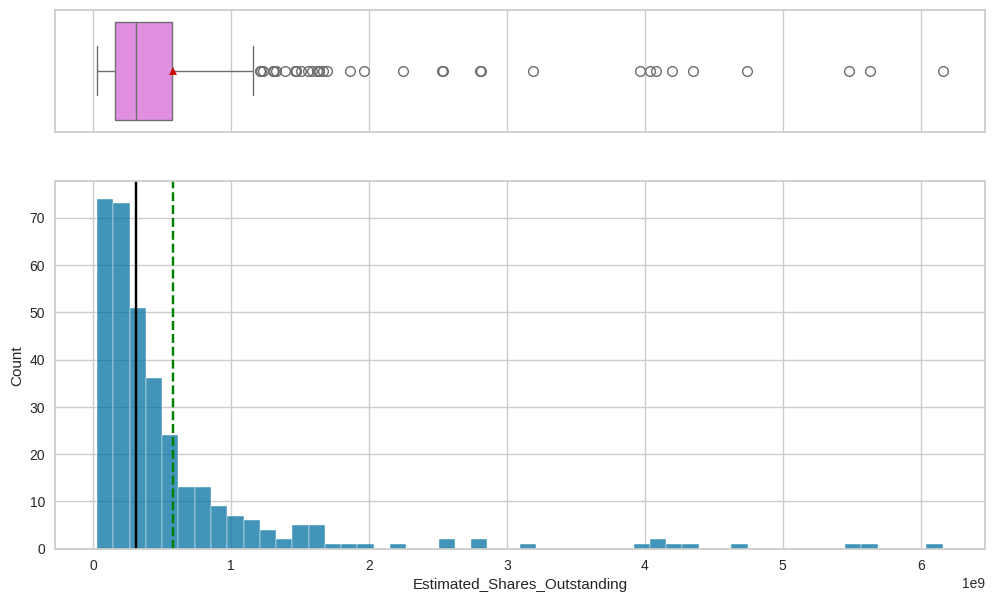

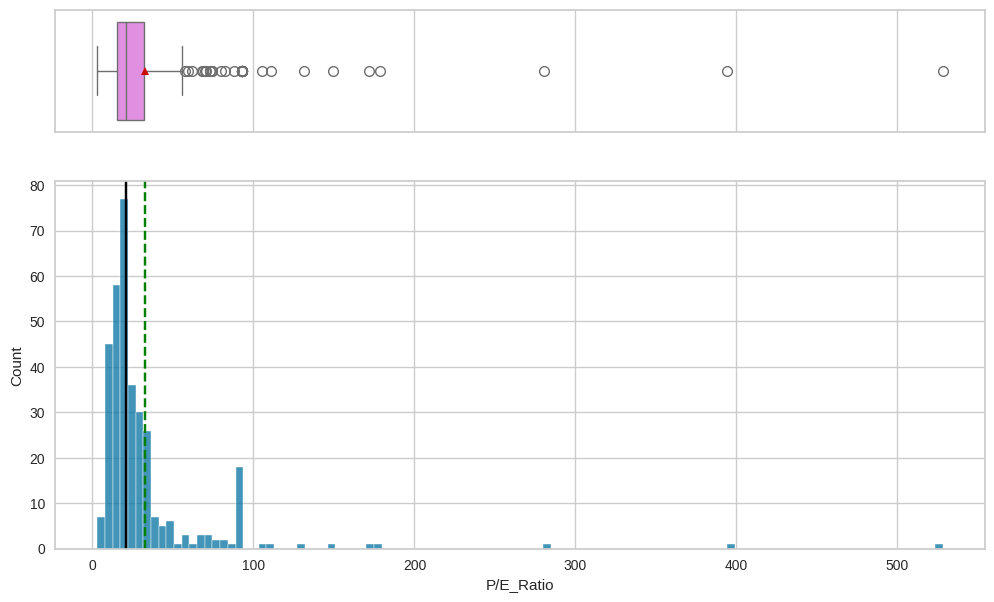

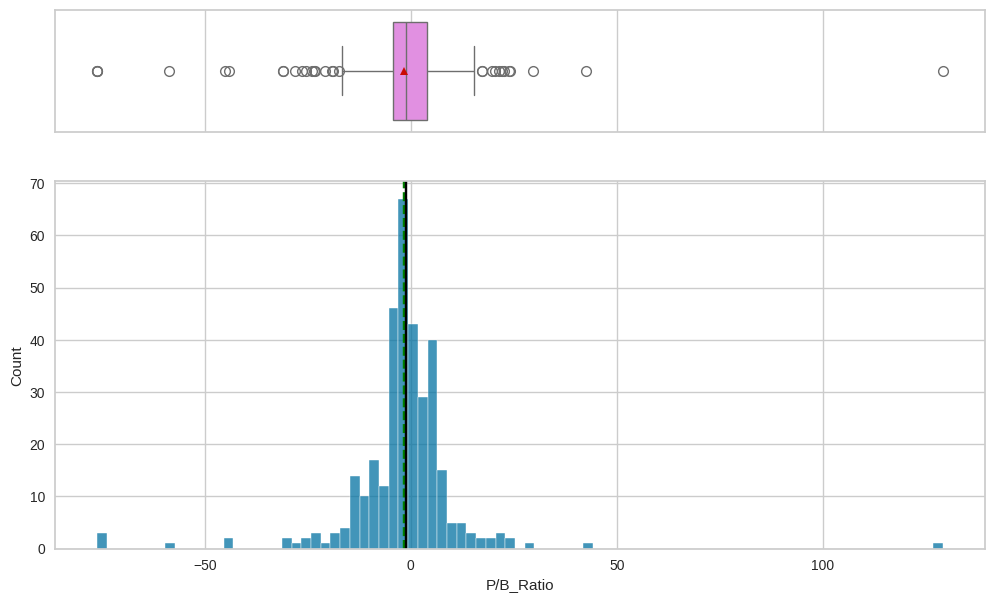

In [ ]:
for feature in df.select_dtypes(include=[np.number]).columns:
  histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

**What does the distribution of stock prices look like?**

The distribution of Current_Price is right skewed. Roughly 95% of the Current_Price is below 200. There are a few outliers.

*   Price_Change column is somewhat normally distributed.
*   Volatality is right skewed meaning the values are lower. Lower the std.dev then less volatile the stock is.
*   ROE, Cash_Ratio are all right skewed.
*   Net_Cash_Flow, Net_Income, Earnings_Per_Share columns are normally distributed.
*   P/E_Ratio is right skewed.Higher the P/E ratio then the stock price is high.
*   P/B_Ratio is normally distributed. P/B value is usually greater since it is taking the book value.

In [ ]:
def countplots(data, feature,perc):
  plt.figure(figsize = (12,7))
  ax = sns.countplot(data = df, x = feature)
  plt.xticks(rotation = 90)
  for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / len(data[feature])
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
  plt.show()

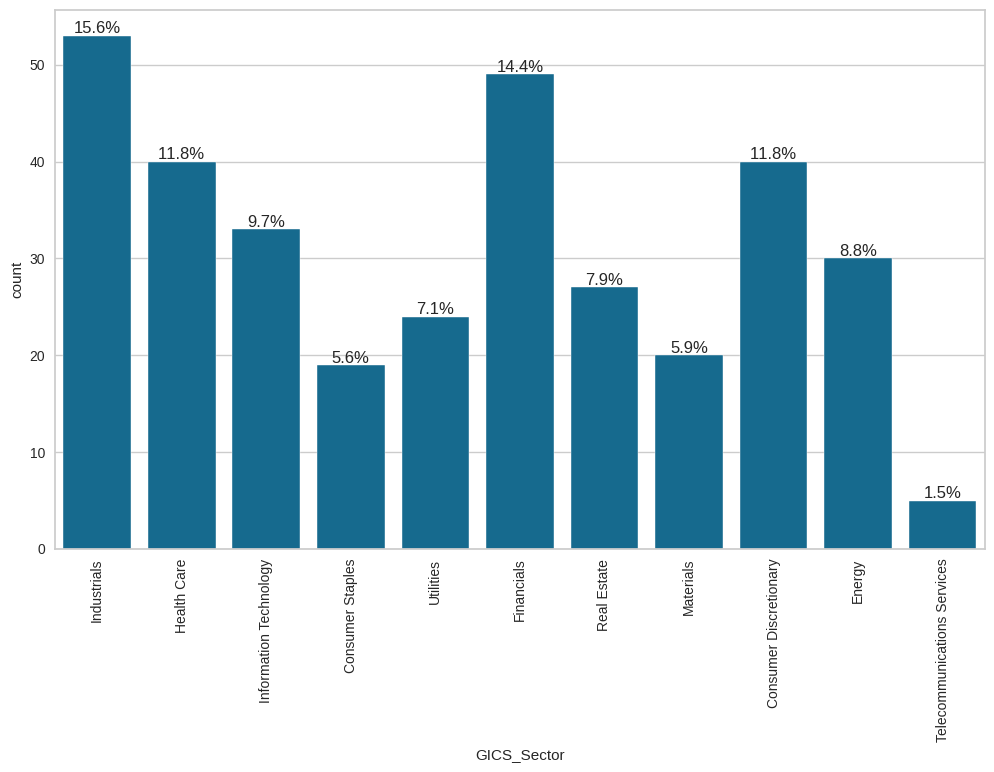

In [ ]:
countplots(df, 'GICS_Sector', perc = True)

*   15.6% of the GICS_Sector are from Industries sector followed by 14.4% in Financials.
*   HealthCare and Consumer Discretionary have 11.8% each and is the third highest.
*   Telecommunications Services is the lowest.

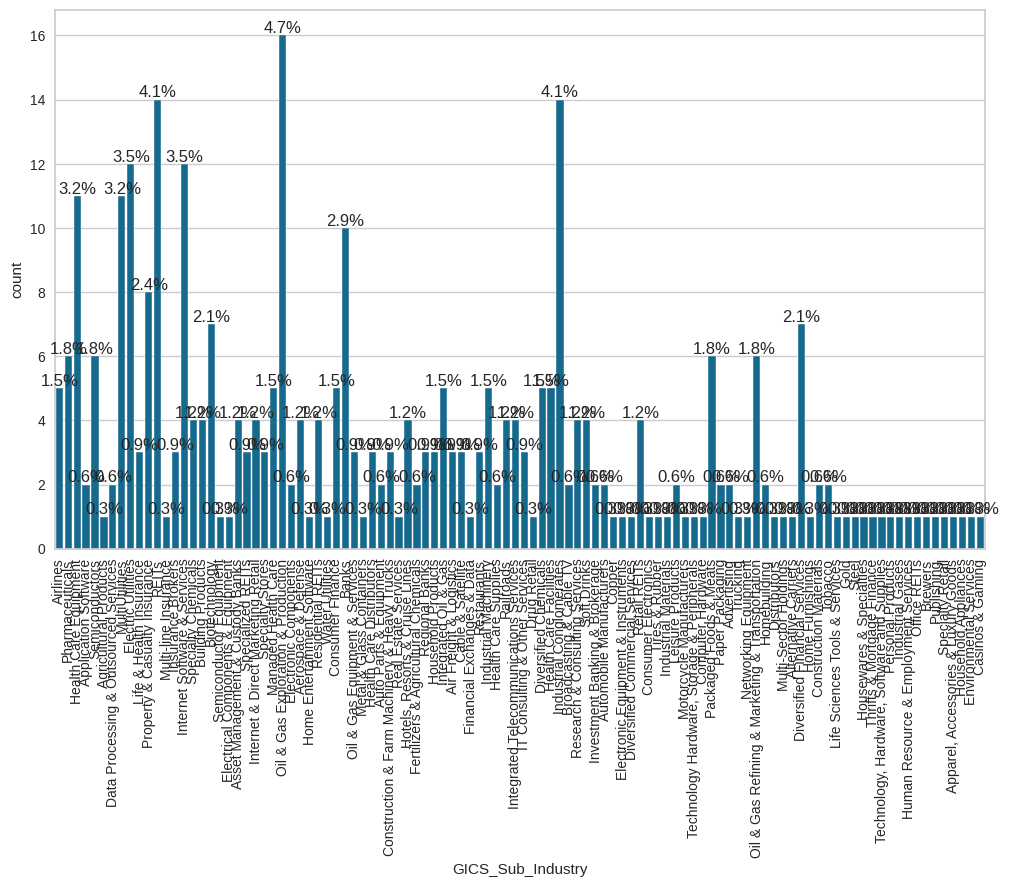

In [ ]:
countplots(df, 'GICS_Sub_Industry', perc = True)

In [ ]:
df['GICS_Sub_Industry'].value_counts().head(15)

GICS_Sub_Industry
Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Semiconductors                                      6
Name: count, dtype: int64

*   Oil and Gas Exploration and Production have the highest count of 16 records in the sub sector followed by REITs and Industrial Conglomerstes with 14 records in each sub sector.
*   Electric Utilities and Internet Software and Services are the third highest with 12 records each.

###Bivariate Analysis

**How are the different variables correlated with each other?**

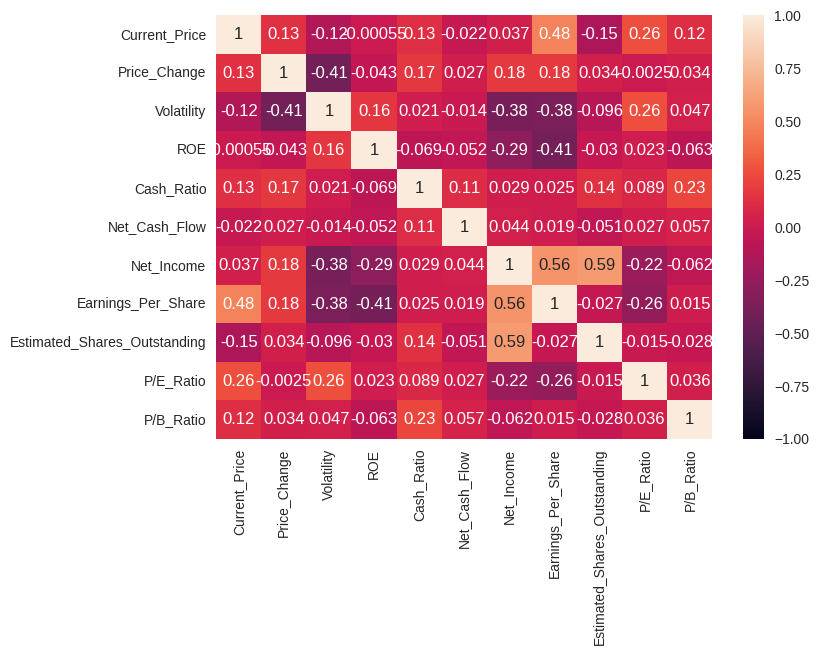

In [ ]:
sns.heatmap(data = df.select_dtypes(include=np.number).corr(),annot=True,vmin=-1,vmax=1);

*   Net_Income is correlated to Estimated_Shares_Outstanding and Earnings_Per_Share.
*   Earnings_Per_Share and Current_Price are correlated.
*   Volatality is not correlated to Price_Change, Net_Income and Earnings_Per_Share.
*   ROE and Earnings_Per_Share are also not correlated.

**The stocks of which economic sector have seen the maximum price increase on average?**

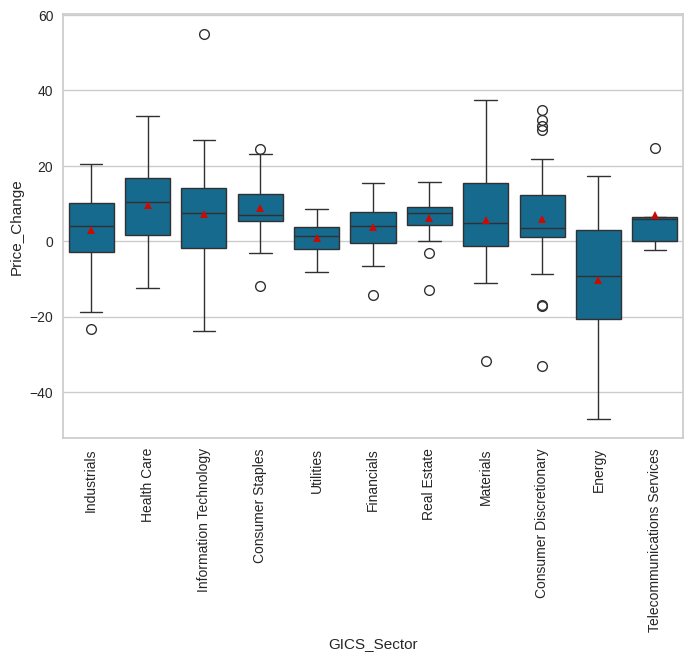

In [ ]:
sns.boxplot(data = df, x = 'GICS_Sector', y = 'Price_Change', showmeans = True);
plt.xticks(rotation = 90);

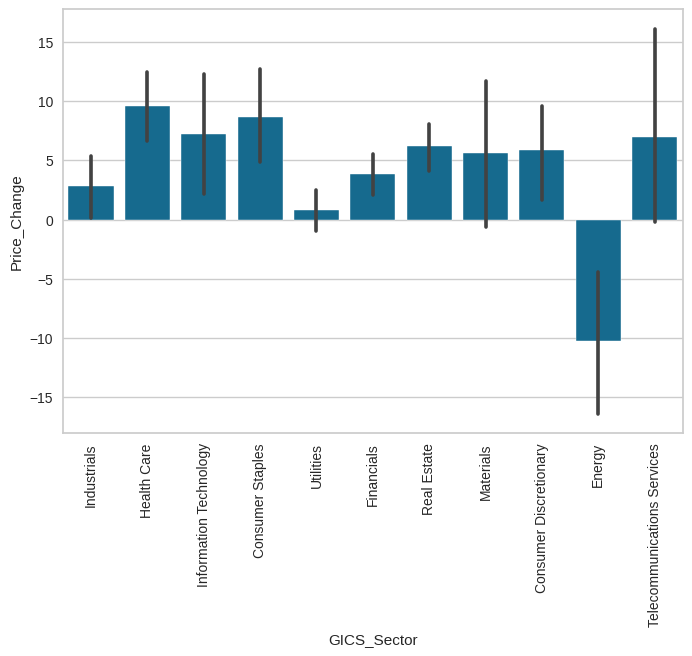

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'Price_Change');
plt.xticks(rotation = 90);

*   Health Care sector have seen maximum price increase.
*   Energy sector has seen decrease in price.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

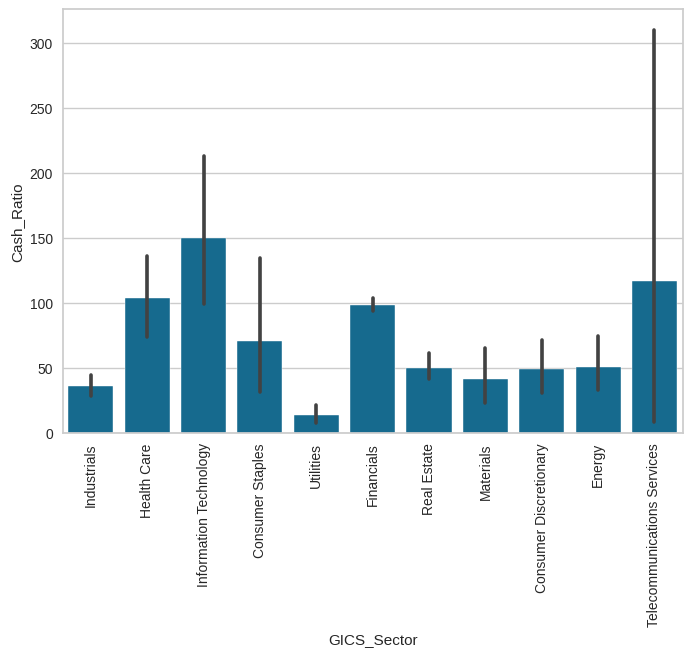

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'Cash_Ratio');
plt.xticks(rotation = 90);

*   Information Technology has the highest Cash_Ratio of about 150.
*   Telecommunication Services has the second highest Cash_Ratio of about 120 followed by Health Care having Cash_Ratio of about 100.
*   Utilities hve the lowest Cash_Ratio of about 12.
*   Industries and Materials also have very low Cash_Ratio of less than 50.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

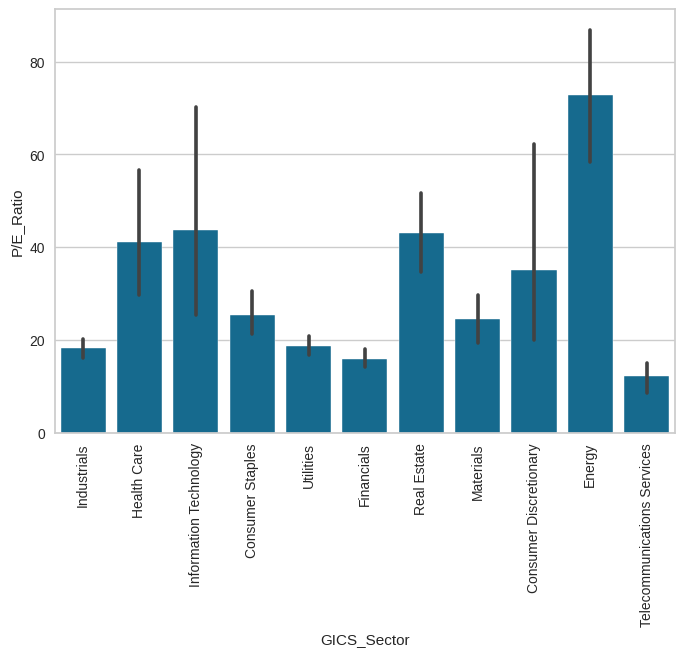

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'P/E_Ratio');
plt.xticks(rotation = 90);

*   Energy Sector have higher P/E_Ratio.
*   Real Estae and Infomation Technology have second highest P/E_Ratio. The ratio is about 40.
*   Telecommunication Services have the lowest P/E_Ratio.
*   Financials, Utilities and Industries have ratio less than 20.

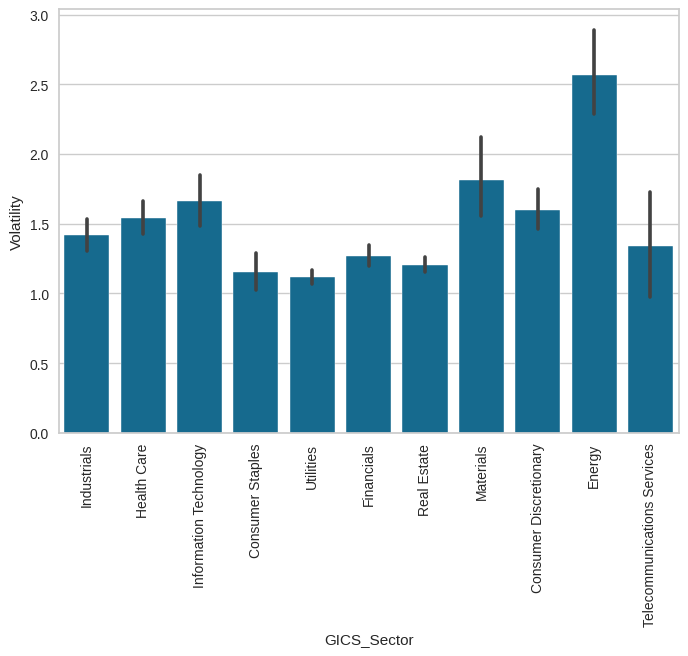

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'Volatility');
plt.xticks(rotation = 90);

*   Energy Sector have high Volatality followed by Materials.
*   Utilities have the lowest Volatality.
*   Consumer Staples, Real Estate and Financials also have less Volatality.

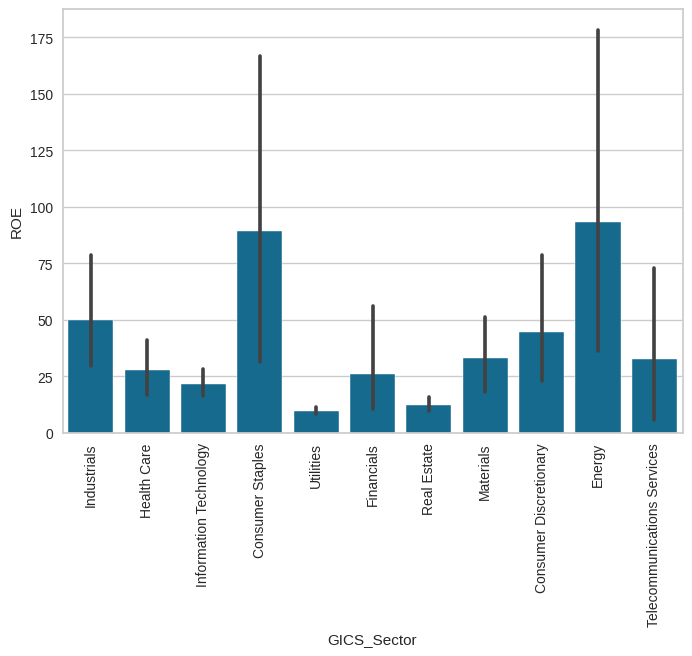

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'ROE');
plt.xticks(rotation = 90);

*   Energy have highest ROE followed by Consumer Staples.
*   Utilities and Real Estate have lowest ROE.

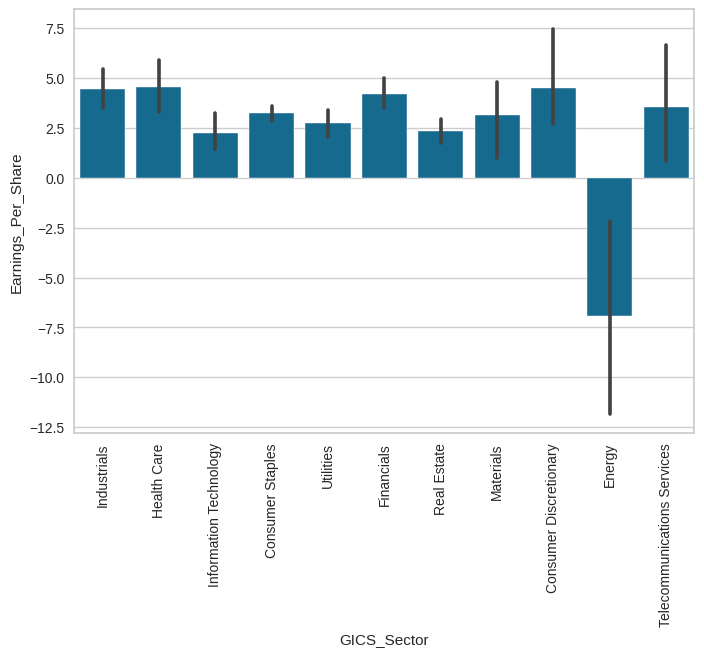

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'Earnings_Per_Share');
plt.xticks(rotation = 90);

*   Energy sector have negative Earnings_Per_Share. All the other sectors have positive Earnings_Per_Share.
*   Industies, Health Care and Consumer Discretionary have the highest Earnings_Per_Share.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

###Outlier check

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
numeric_columns

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'P/E_Ratio',
 'P/B_Ratio']

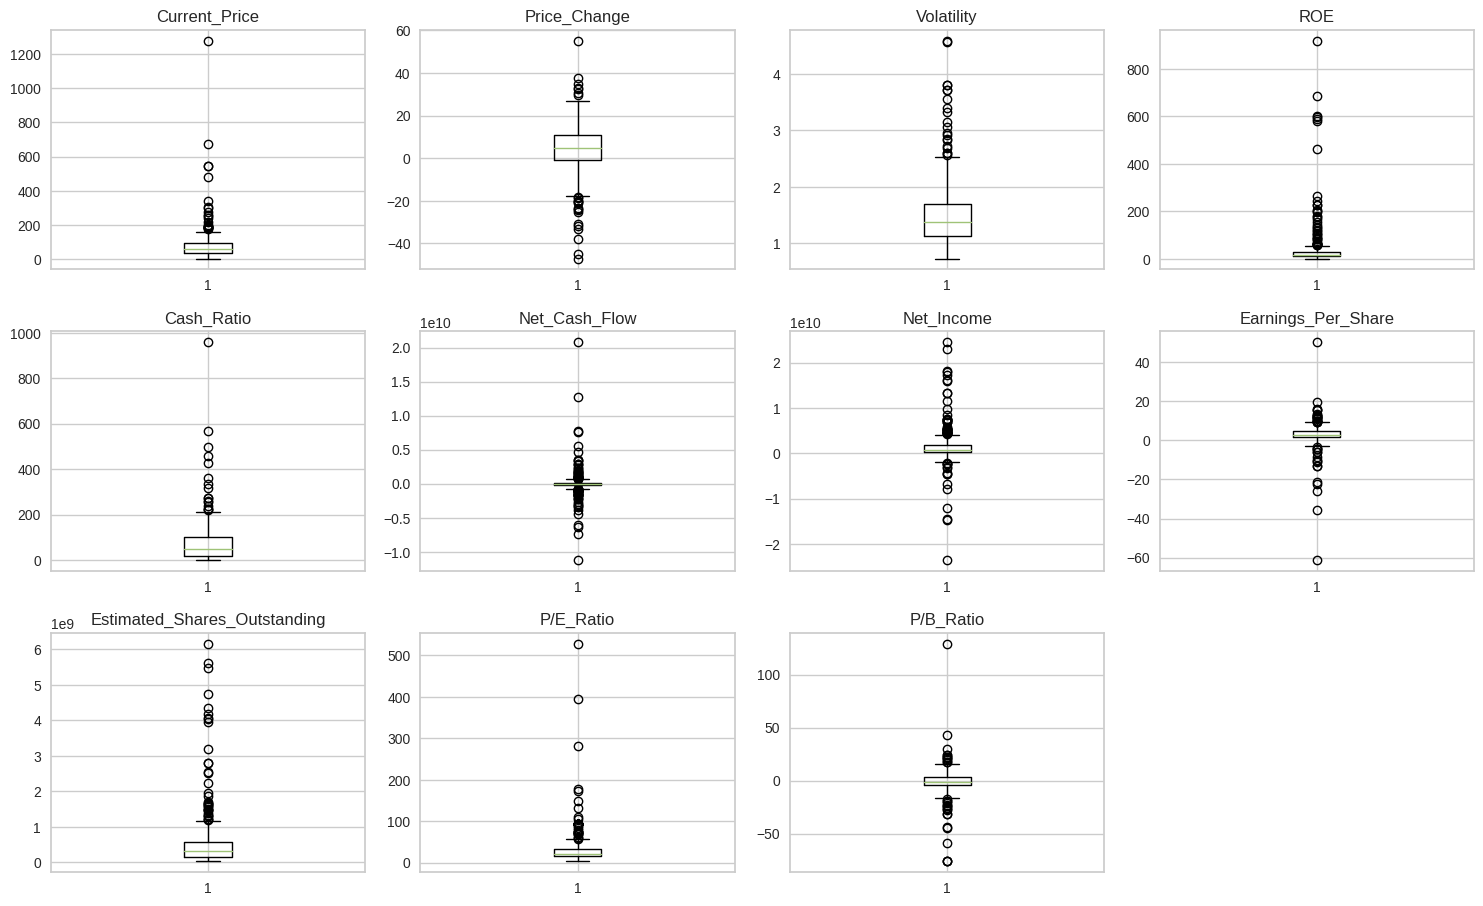

In [ ]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
def cap_data(df):
    for col in df[numeric_columns]:
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
    return df

final_df=cap_data(df)

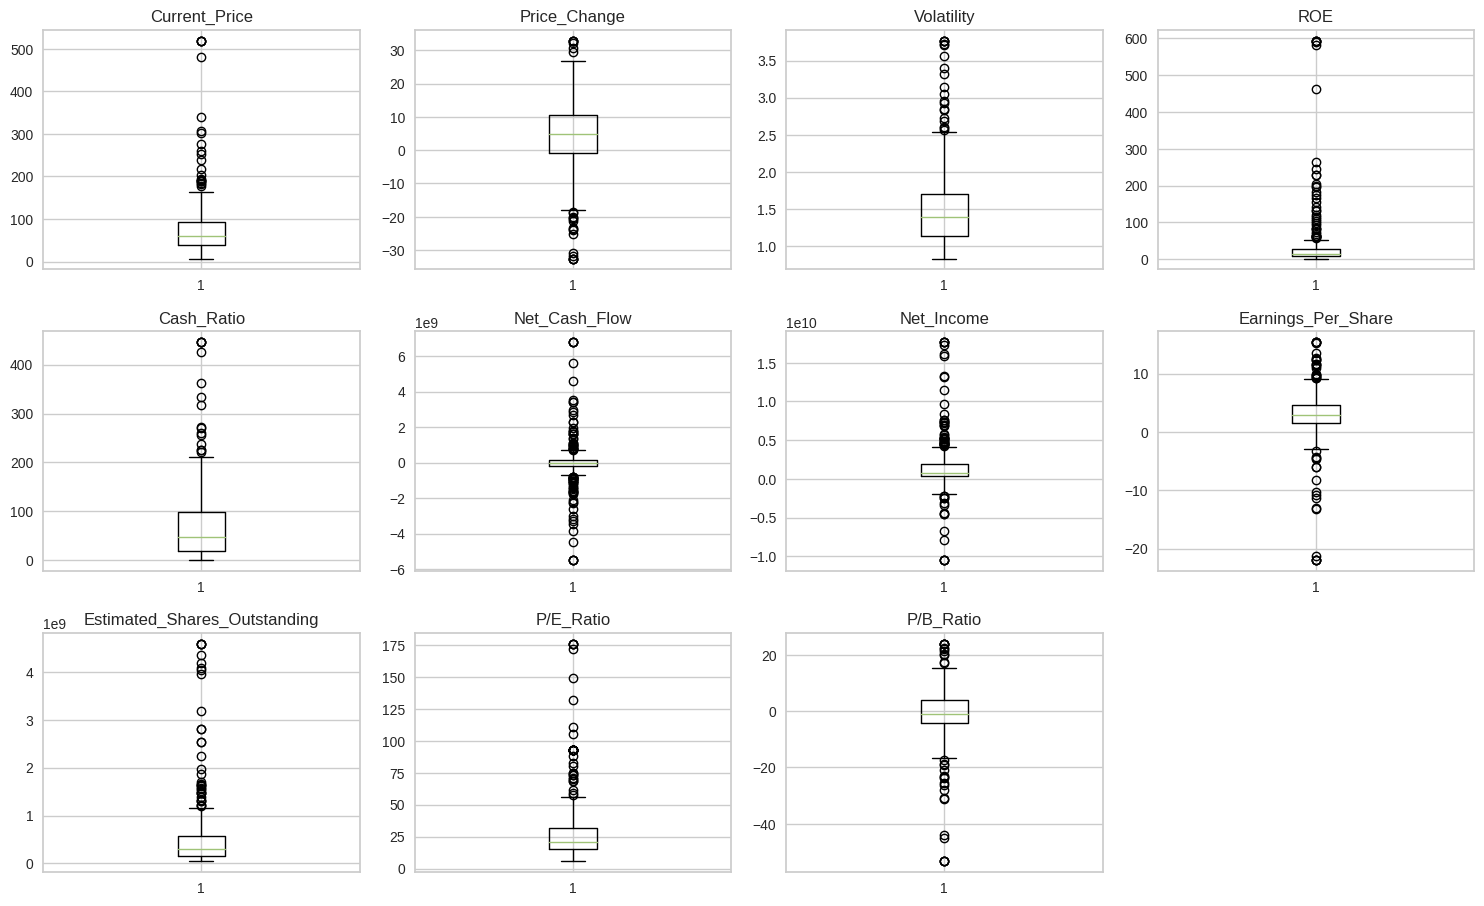

In [ ]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(final_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We treated the outliers in the dataset by capping the top and bottom 1% values.

###Scaling

In [ ]:
scaler = StandardScaler()
subset = final_df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0        -0.488922      0.520415    0.291560  1.111332   -0.223265   
1        -0.257520      0.374217    1.190631  1.053841    0.118701   
2        -0.453848      0.634968   -0.436351 -0.199463   -0.012825   
3         0.217890      0.870573   -0.288424 -0.337441    1.473414   
4        -0.311226     -0.520924    0.316236 -0.279950    2.683449   
..             ...           ...         ...       ...         ...   
335      -0.613460      0.950737    0.569690 -0.268452    4.968574   
336      -0.349640     -1.125861   -0.075073  1.191819   -0.538927   
337       0.336399      0.462985   -0.206521 -0.417928    0.421210   
338      -0.695115     -0.462001   -0.093911 -0.394932    0.408057   
339      -0.412610      1.108429    0.156249 -0.072982   -0.039130   

     Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0        -0.460942    1.770100            1.774006   
1         0.024025    1.052842            0.066476   
2         0.680766    0.843132            0.022959   
3        -0.192056   -0.260226           -0.325178   
4         0.219581   -0.240644           -0.522041   
..             ...         ...                 ...   
335      -0.777975   -1.711215           -1.547803   
336       0.103989   -0.067256            0.029176   
337       0.264657   -0.400580           -0.424646   
338      -0.046035   -0.353324           -0.337612   
339       0.187655   -0.344736           -0.445368   

     Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
0                        0.129854  -0.860697  -0.645501  
1                        1.361269  -0.406345  -0.642307  
2                        1.197154  -0.527625   0.139204  
3                       -0.085173   1.508580   0.568856  
4                        2.146121   4.990375   0.275192  
..                            ...        ...        ...  
335                      0.476130  -0.057021   0.761722  
336                     -0.167221  -0.444957  -0.182915  
337                     -0.482312   3.465441  -2.057798  
338                     -0.393702  -0.270884   0.170169  
339                     -0.086595   1.368266   0.337225  

[340 rows x 11 columns]

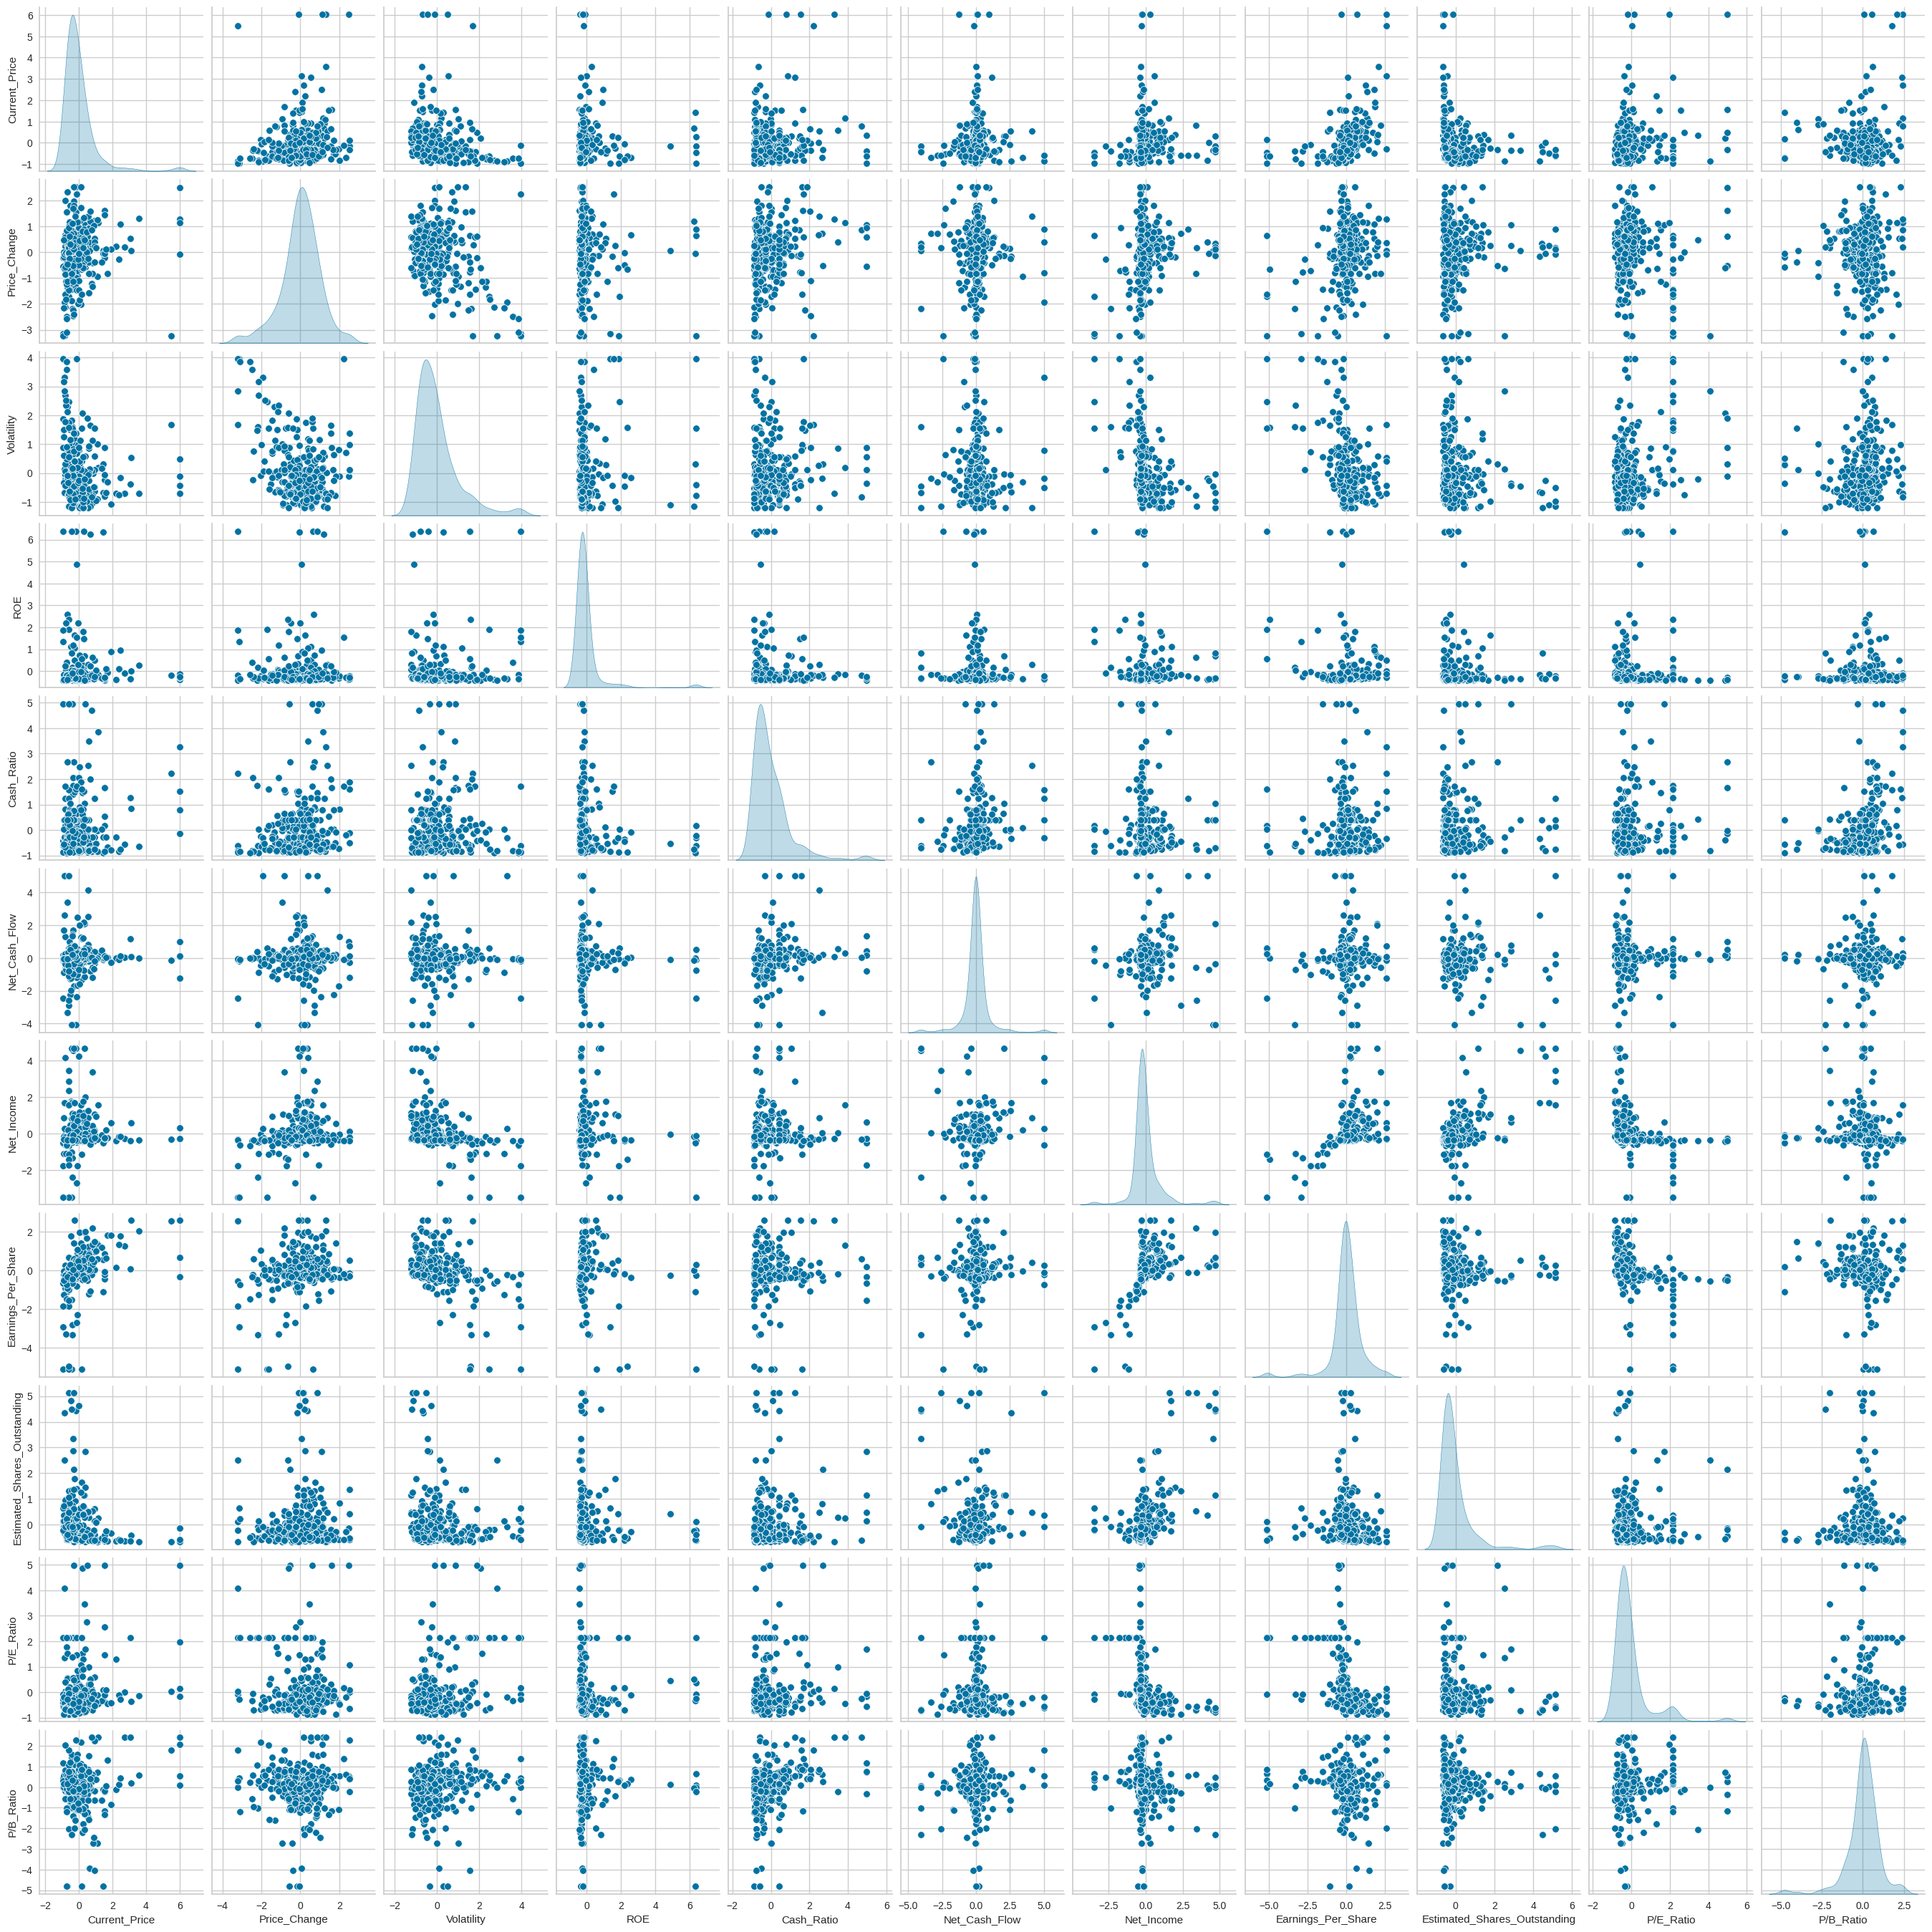

In [ ]:
sns.pairplot(subset_scaled_df, diag_kind = 'kde');

## EDA

###Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

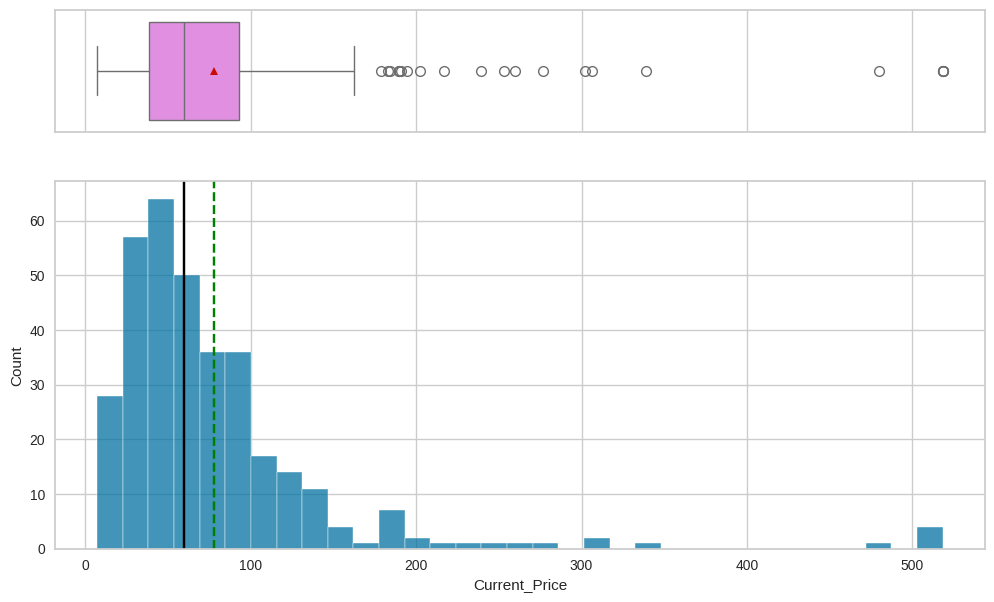

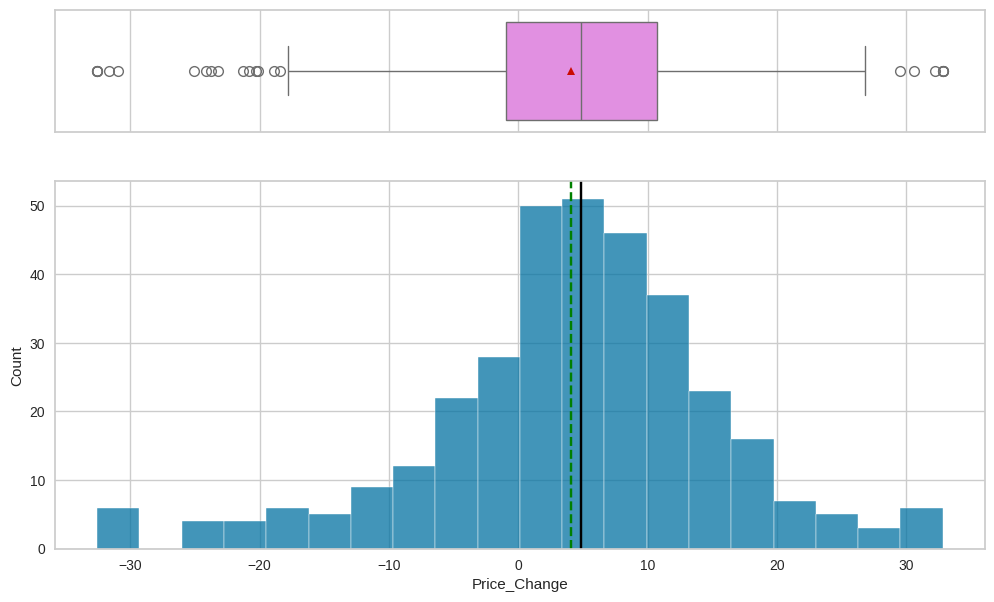

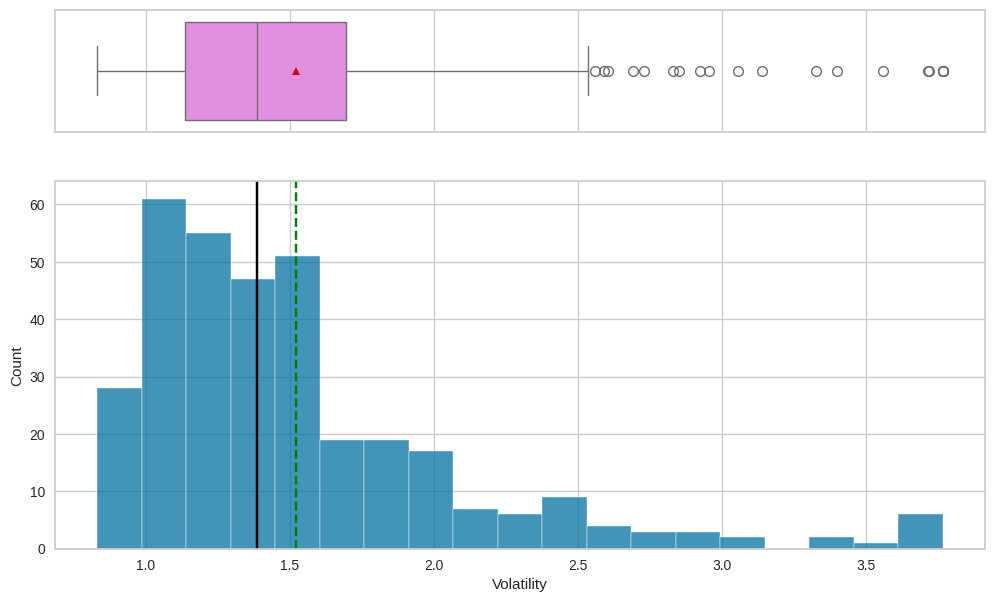

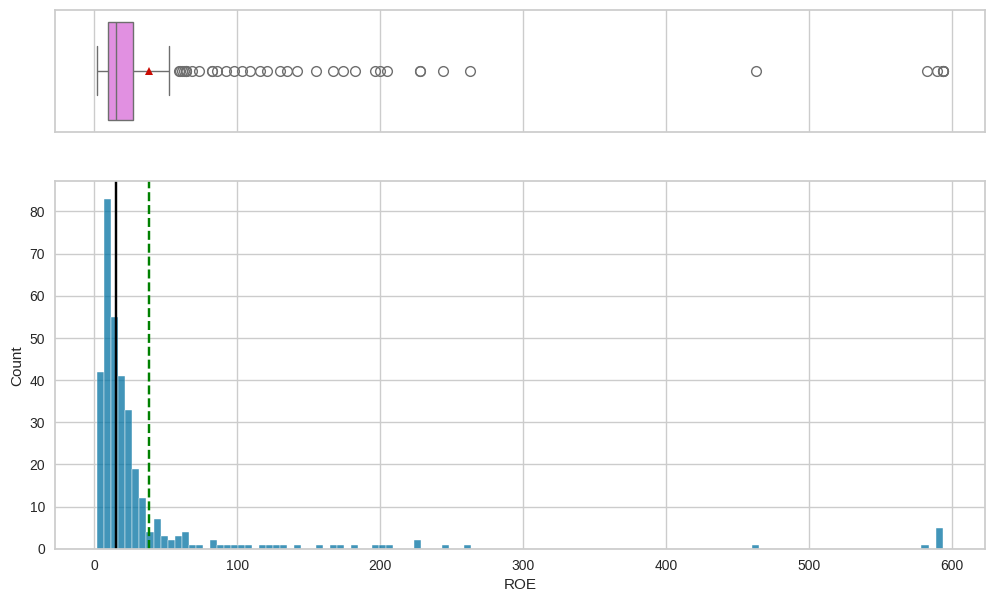

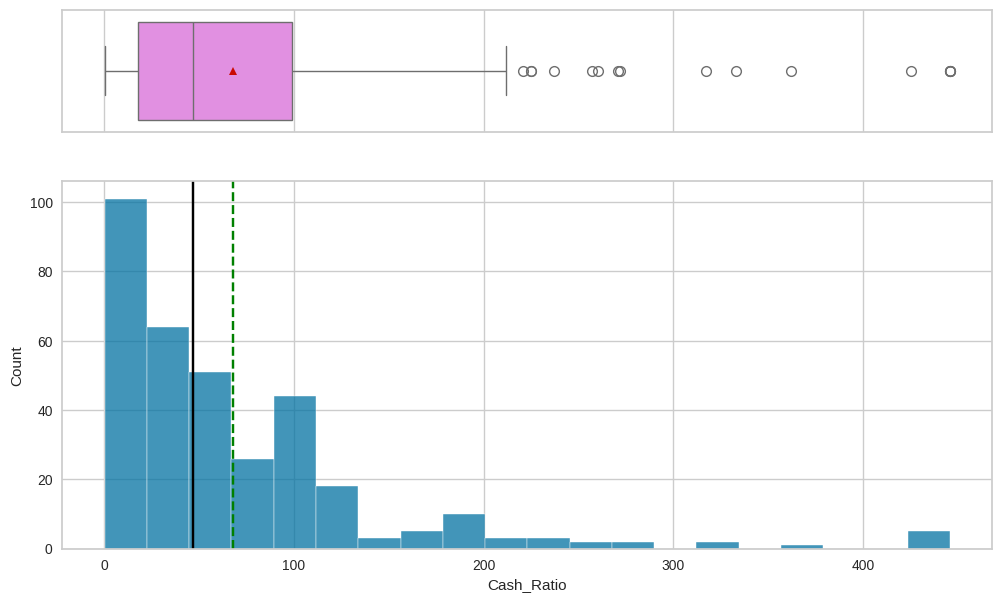

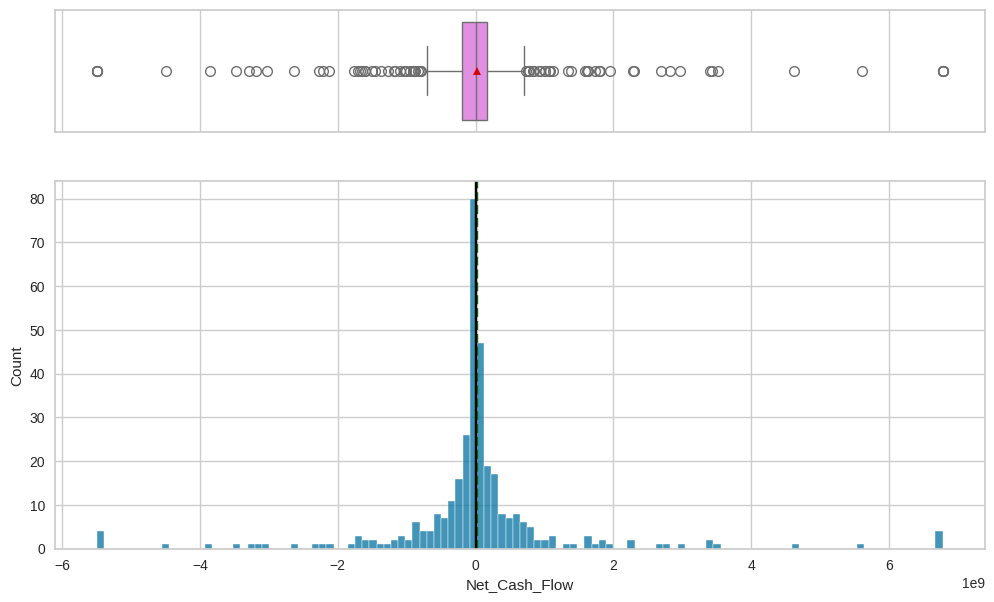

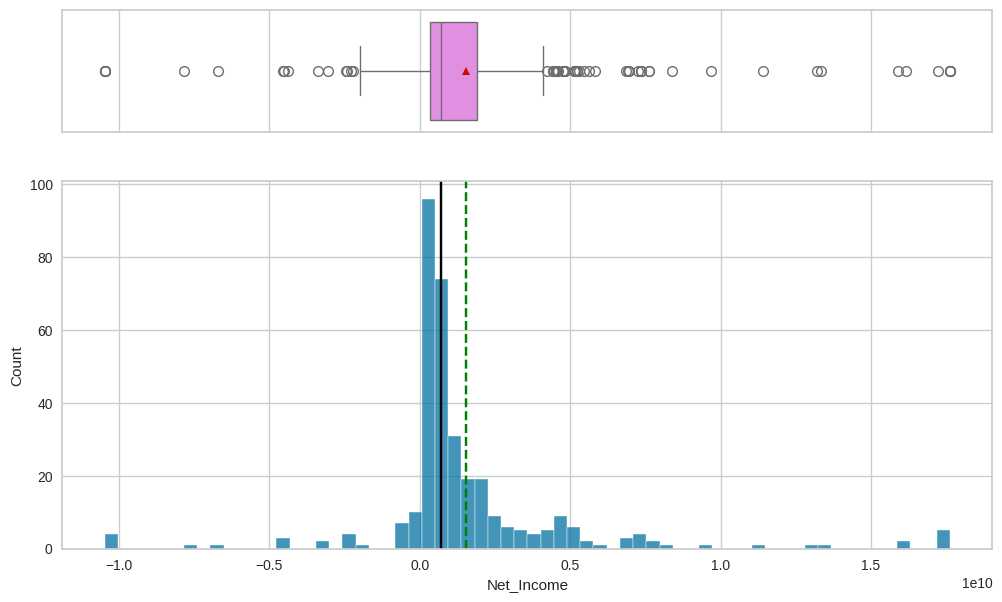

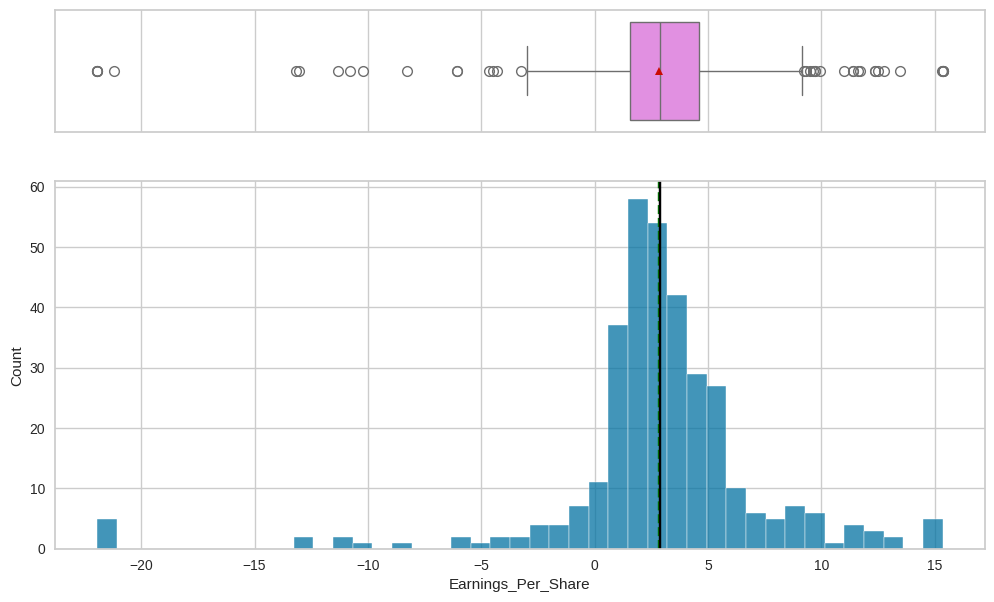

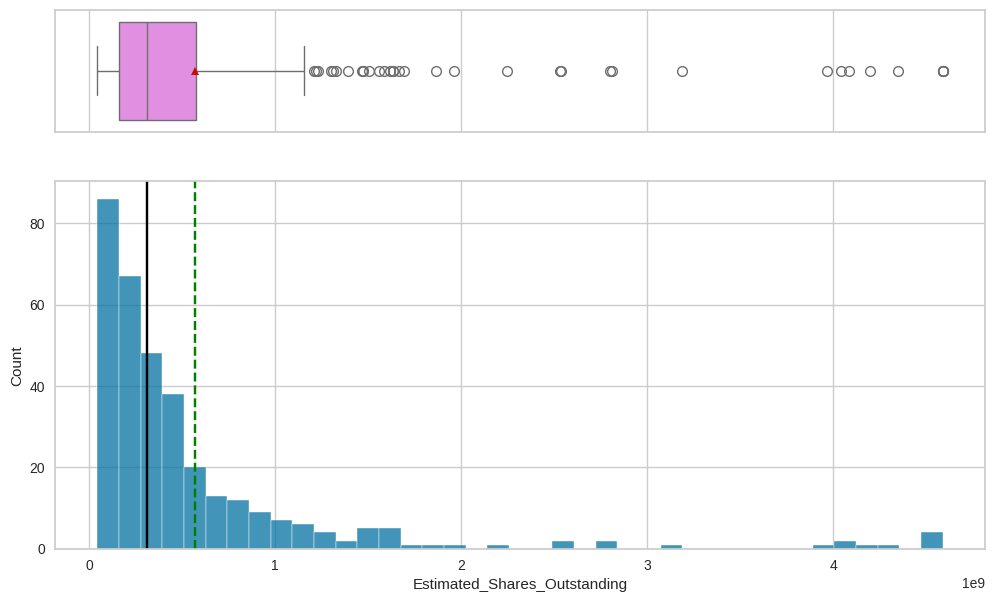

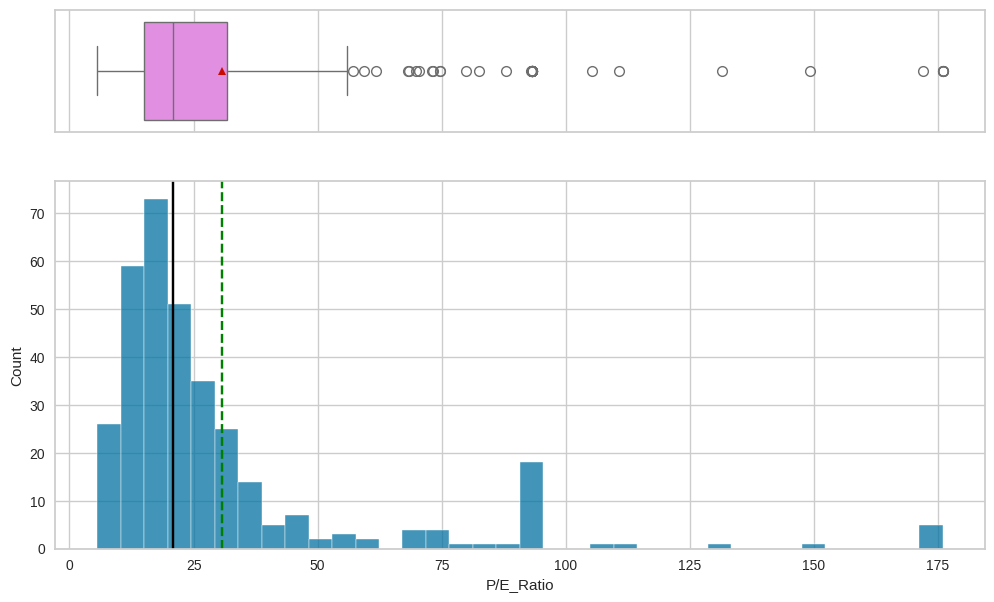

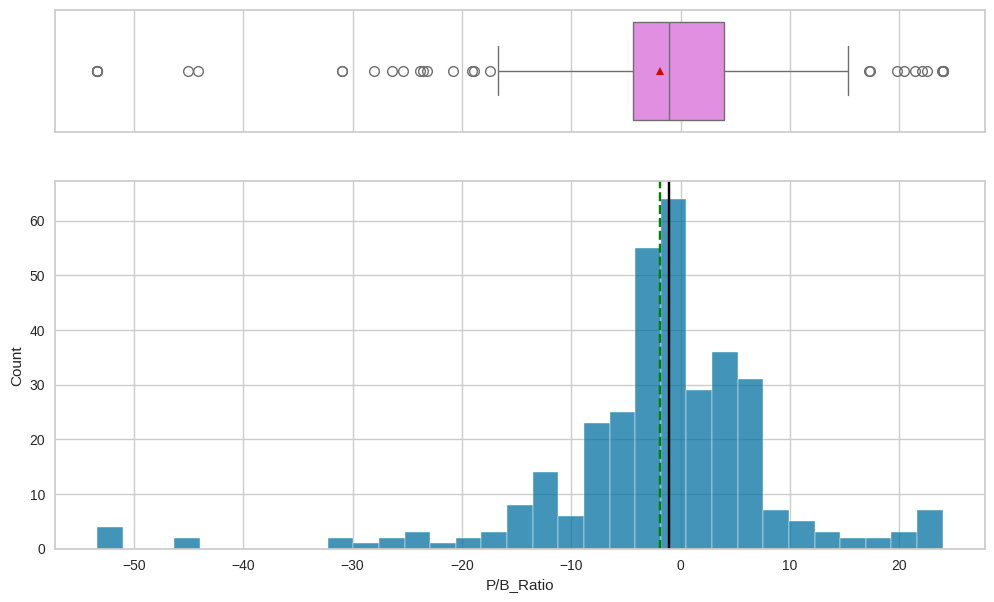

In [ ]:
for feature in df.select_dtypes(include=[np.number]).columns:
  histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

**What does the distribution of stock prices look like?**

The distribution of Current_Price is right skewed. Roughly 95% of the Current_Price is below 200. There are a few outliers.

*   Price_Change column is somewhat normally distributed.
*   Volatality is right skewed meaning the values are lower. Lower the std.dev then less volatile the stock is.
*   ROE, Cash_Ratio are all right skewed.
*   Net_Cash_Flow, Net_Income, Earnings_Per_Share columns are normally distributed.
*   P/E_Ratio is right skewed.Higher the P/E ratio then the stock price is high.
*   P/B_Ratio is normally distributed. P/B value is usually greater since it is taking the book value.

In [ ]:
def countplots(data, feature,perc):
  plt.figure(figsize = (12,7))
  ax = sns.countplot(data = df, x = feature)
  plt.xticks(rotation = 90)
  for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / len(data[feature])
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
  plt.show()

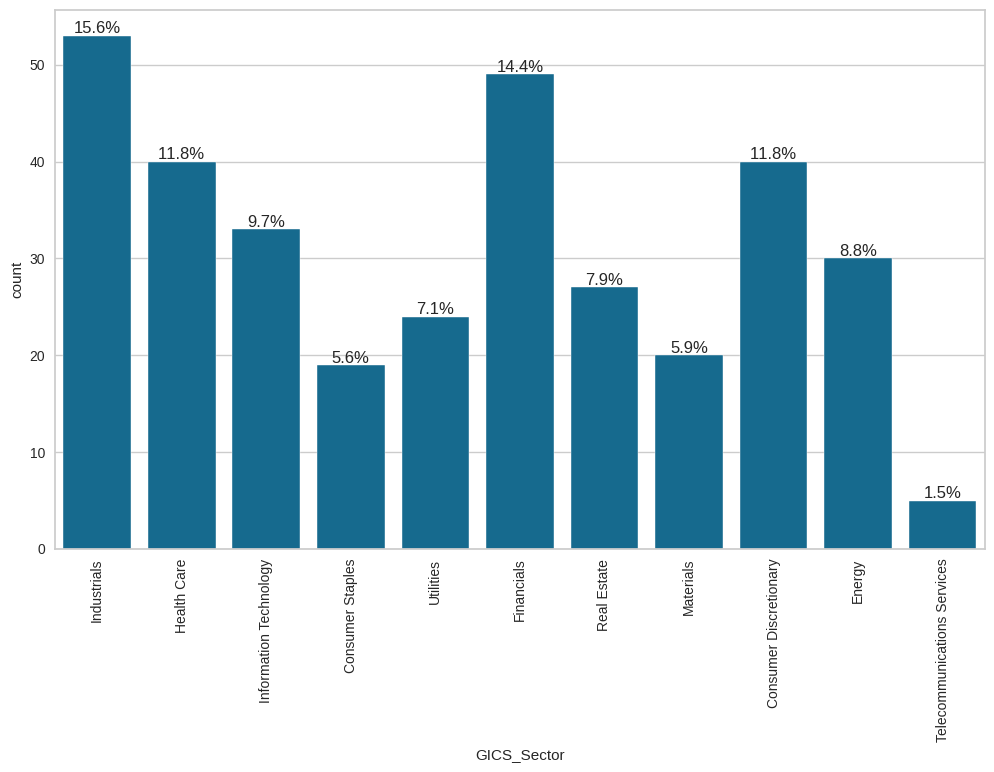

In [ ]:
countplots(df, 'GICS_Sector', perc = True)

*   15.6% of the GICS_Sector are from Industries sector followed by 14.4% in Financials.
*   HealthCare and Consumer Discretionary have 11.8% each and is the third highest.
*   Telecommunications Services is the lowest.

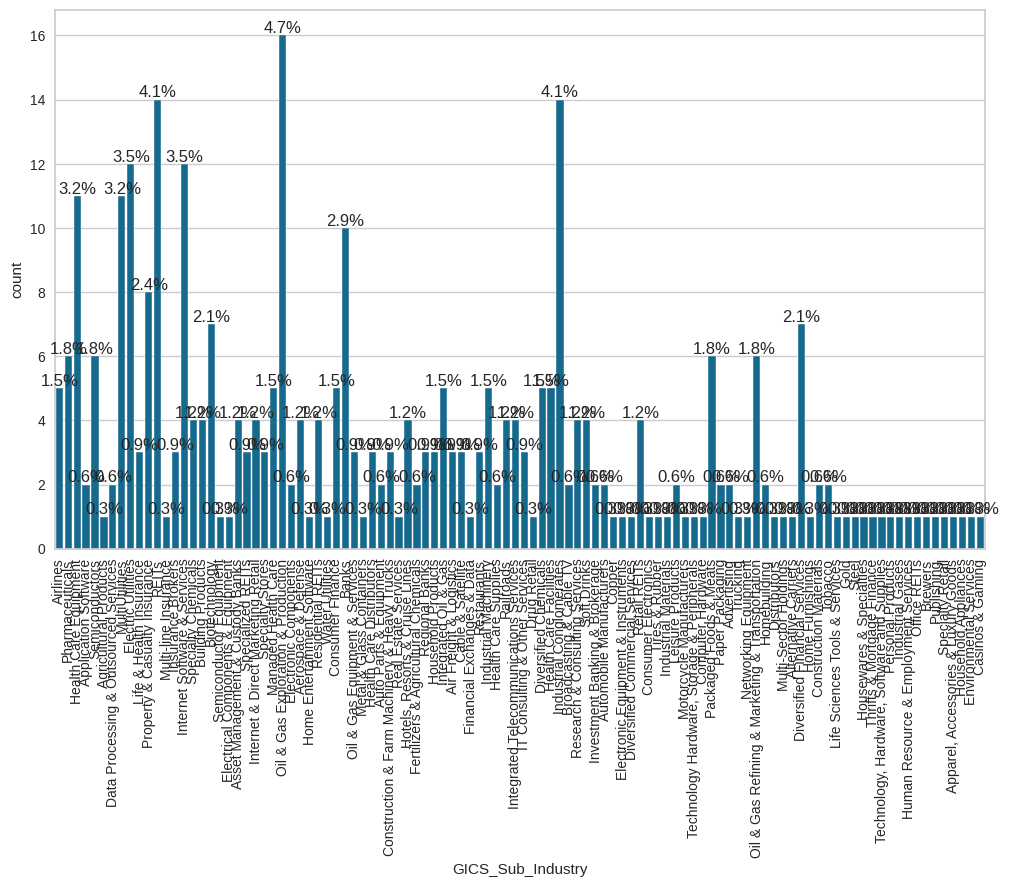

In [ ]:
countplots(df, 'GICS_Sub_Industry', perc = True)

In [ ]:
df['GICS_Sub_Industry'].value_counts().head(15)

GICS_Sub_Industry
Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Semiconductors                                      6
Name: count, dtype: int64

*   Oil and Gas Exploration and Production have the highest count of 16 records in the sub sector followed by REITs and Industrial Conglomerstes with 14 records in each sub sector.
*   Electric Utilities and Internet Software and Services are the third highest with 12 records each.

###Bivariate Analysis

**How are the different variables correlated with each other?**

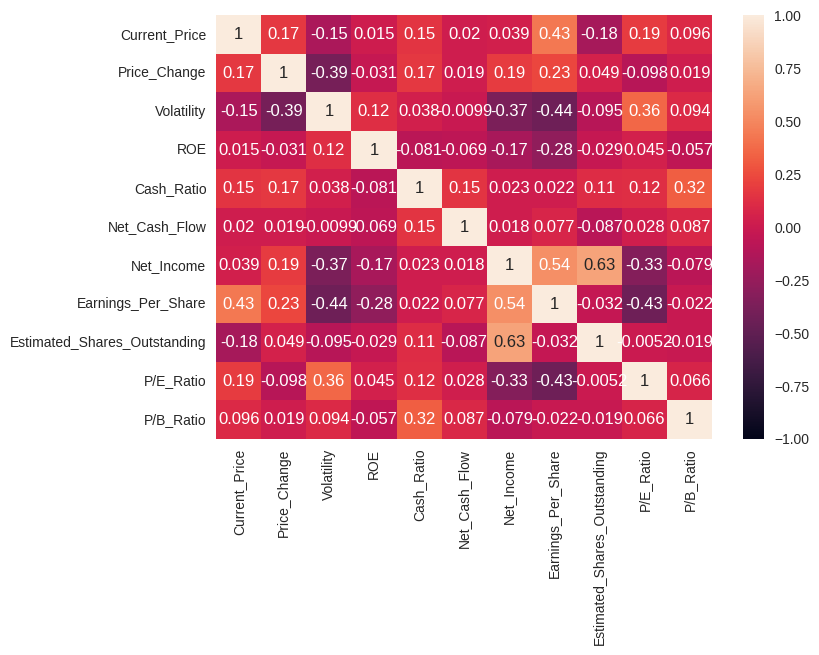

In [ ]:
sns.heatmap(data = df.select_dtypes(include=np.number).corr(),annot=True,vmin=-1,vmax=1);

*   Net_Income is correlated to Estimated_Shares_Outstanding and Earnings_Per_Share.
*   Earnings_Per_Share and Current_Price are correlated.
*   Volatality is not correlated to Price_Change, Net_Income and Earnings_Per_Share.
*   ROE and Earnings_Per_Share are also not correlated.

**The stocks of which economic sector have seen the maximum price increase on average?**

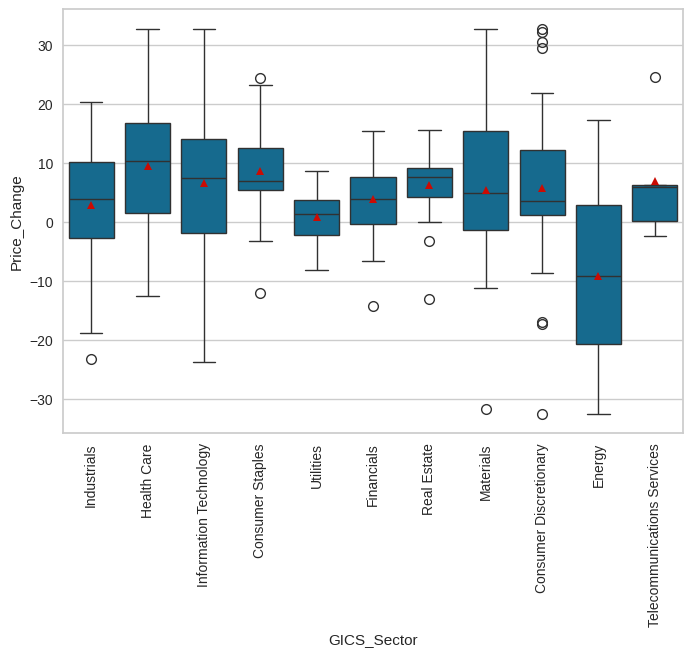

In [ ]:
sns.boxplot(data = df, x = 'GICS_Sector', y = 'Price_Change', showmeans = True);
plt.xticks(rotation = 90);

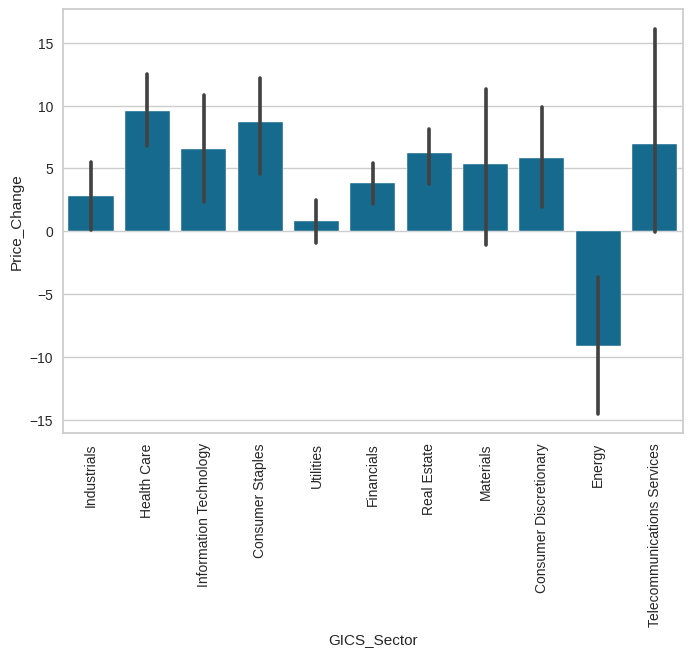

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'Price_Change');
plt.xticks(rotation = 90);

*   Health Care sector have seen maximum price increase.
*   Energy sector has seen decrease in price.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

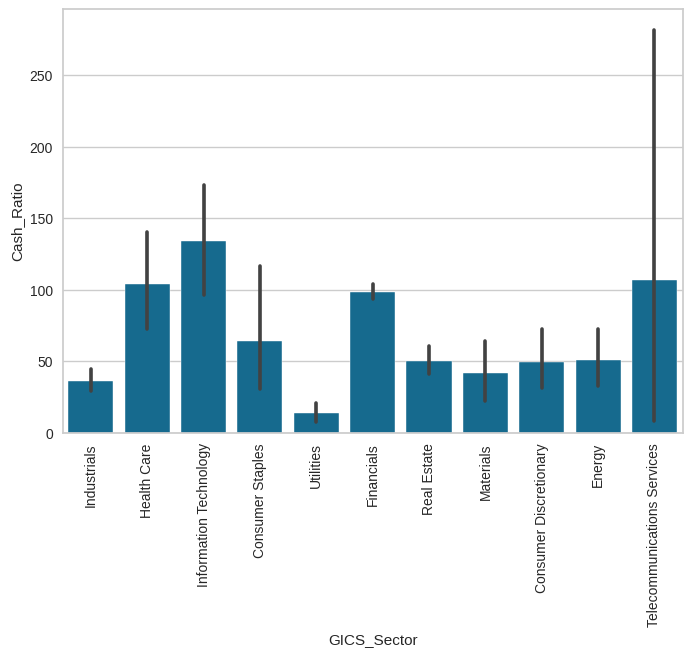

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'Cash_Ratio');
plt.xticks(rotation = 90);

*   Information Technology has the highest Cash_Ratio of about 130.
*   Telecommunication Services has the second highest Cash_Ratio of about 110 followed by Health Care having Cash_Ratio of about 100.
*   Utilities hve the lowest Cash_Ratio of about 15.
*   Industries and Materials also have very low Cash_Ratio of less than 50.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

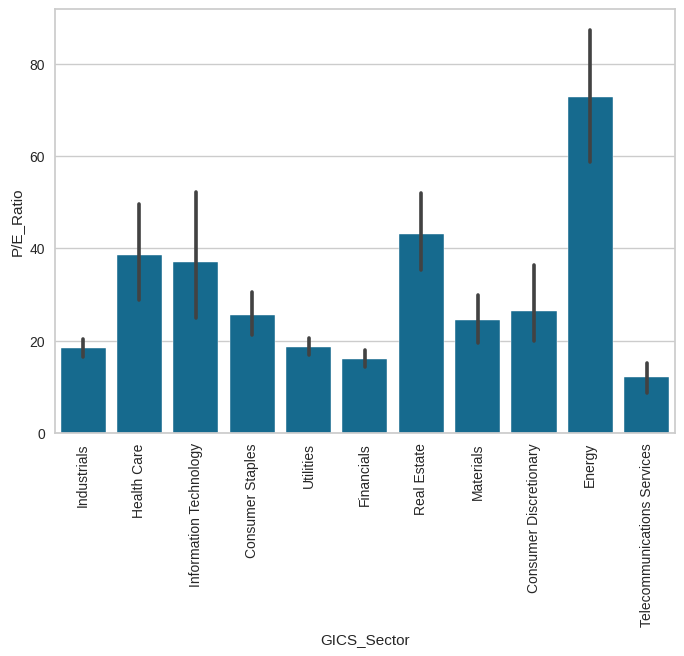

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'P/E_Ratio');
plt.xticks(rotation = 90);

*   Energy Sector have higher P/E_Ratio.
*   Real Estae have second highest P/E_Ratio. The ratio is about 40.
*   Telecommunication Services have the lowest P/E_Ratio.
*   Financials, Utilities and Industries have ratio less than 20.

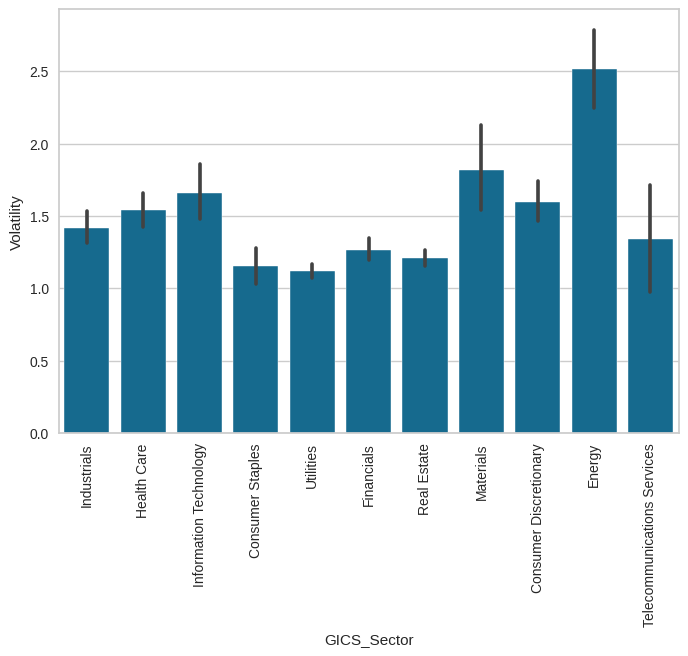

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'Volatility');
plt.xticks(rotation = 90);

*   Energy Sector have high Volatality followed by Materials.
*   Utilities have the lowest Volatality.
*   Consumer Staples, Real Estate and Financials also have less Volatality.

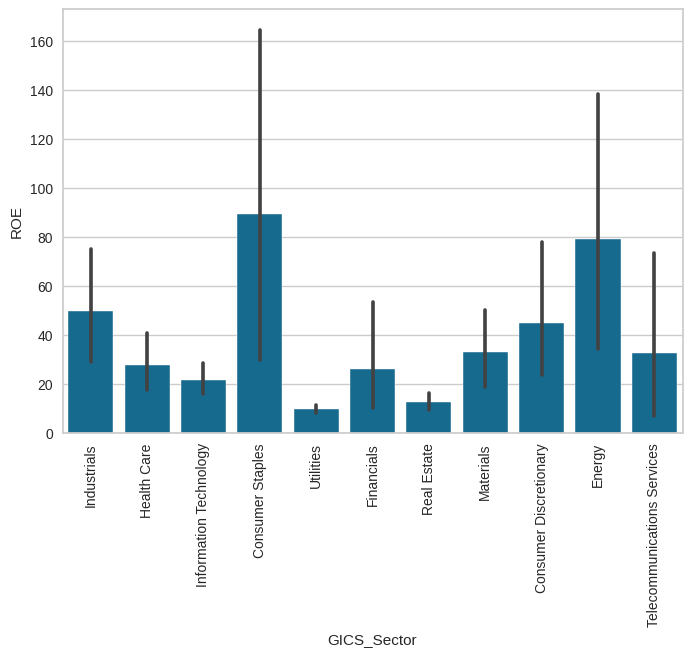

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'ROE');
plt.xticks(rotation = 90);

*   Energy and Consumer Staples have highest ROE.
*   Utilities and Real Estate have lowest ROE.

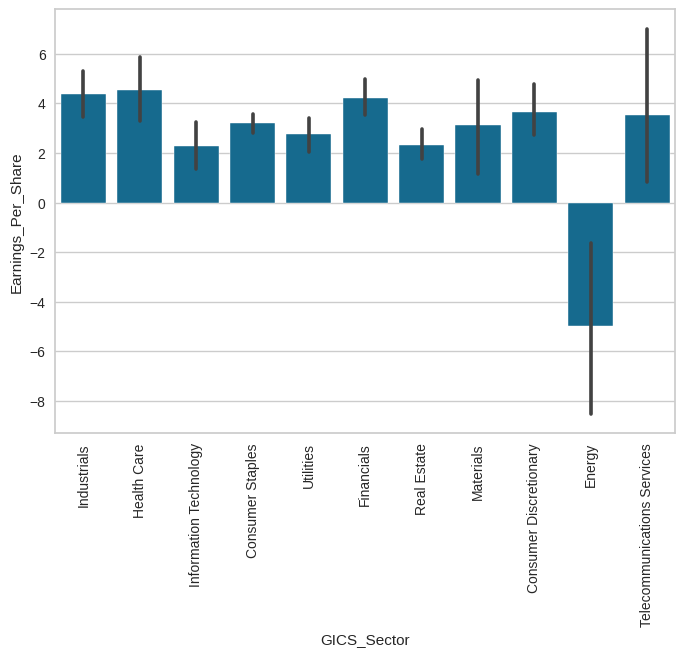

In [ ]:
sns.barplot(data = df, x = 'GICS_Sector', y = 'Earnings_Per_Share');
plt.xticks(rotation = 90);

*   Energy sector have negative Earnings_Per_Share. All the other sectors have positive Earnings_Per_Share.
*   Industies, Health Care and Financials have the highest Earnings_Per_Share.

## K-means Clustering

In [ ]:
kmeans_subset_scaled_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.7790785123743555
Number of Clusters: 2 	Average Distortion: 2.589552885483864
Number of Clusters: 3 	Average Distortion: 2.4682328621928855
Number of Clusters: 4 	Average Distortion: 2.3567447375247266
Number of Clusters: 5 	Average Distortion: 2.284893527075642
Number of Clusters: 6 	Average Distortion: 2.2112423444055773
Number of Clusters: 7 	Average Distortion: 2.1501499019488755
Number of Clusters: 8 	Average Distortion: 2.1028248049386202
Number of Clusters: 9 	Average Distortion: 2.021718561203736
Number of Clusters: 10 	Average Distortion: 1.9741603808596424
Number of Clusters: 11 	Average Distortion: 1.9249049806498968
Number of Clusters: 12 	Average Distortion: 1.897695531694517
Number of Clusters: 13 	Average Distortion: 1.8538553906135609
Number of Clusters: 14 	Average Distortion: 1.8207517413337548
Number of Clusters: 15 	Average Distortion: 1.7805269670650326


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

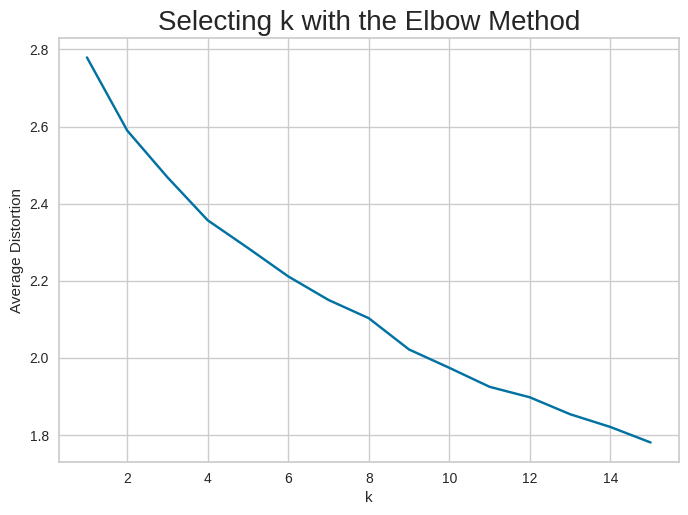

In [ ]:
clusters = range(1, 16)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(kmeans_subset_scaled_df)
    prediction = model.predict(kmeans_subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(kmeans_subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / kmeans_subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

Let's take k = 8 clusters to 10 clusters and check the silhouette scores.

For n_clusters = 2, the silhouette score is 0.4093640249412158)
For n_clusters = 3, the silhouette score is 0.40209262038095867)
For n_clusters = 4, the silhouette score is 0.38589279244175845)
For n_clusters = 5, the silhouette score is 0.33290392690426807)
For n_clusters = 6, the silhouette score is 0.3398095620707442)
For n_clusters = 7, the silhouette score is 0.3196212759910454)
For n_clusters = 8, the silhouette score is 0.1786493315839394)
For n_clusters = 9, the silhouette score is 0.29047552623570444)
For n_clusters = 10, the silhouette score is 0.12822223798789473)
For n_clusters = 11, the silhouette score is 0.1377645164752649)
For n_clusters = 12, the silhouette score is 0.1389618141213369)
For n_clusters = 13, the silhouette score is 0.16386577741433433)
For n_clusters = 14, the silhouette score is 0.13254975574847108)
For n_clusters = 15, the silhouette score is 0.14536746210109583)


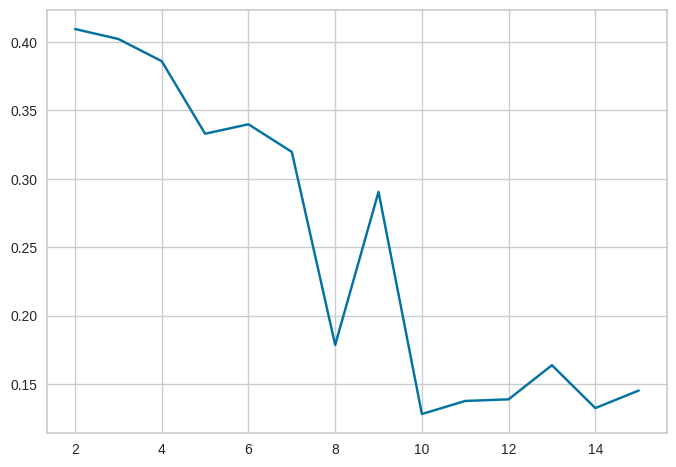

In [ ]:
sil_score = []
cluster_list = list(range(2, 16))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((kmeans_subset_scaled_df))
    score = silhouette_score(kmeans_subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

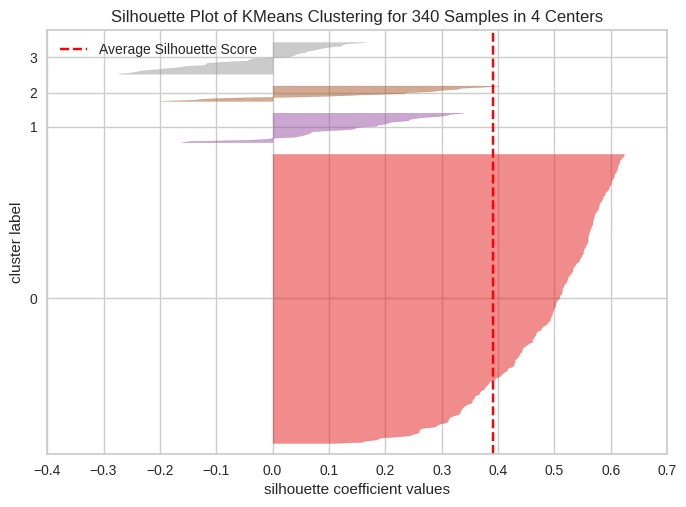

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(kmeans_subset_scaled_df)
visualizer.show()

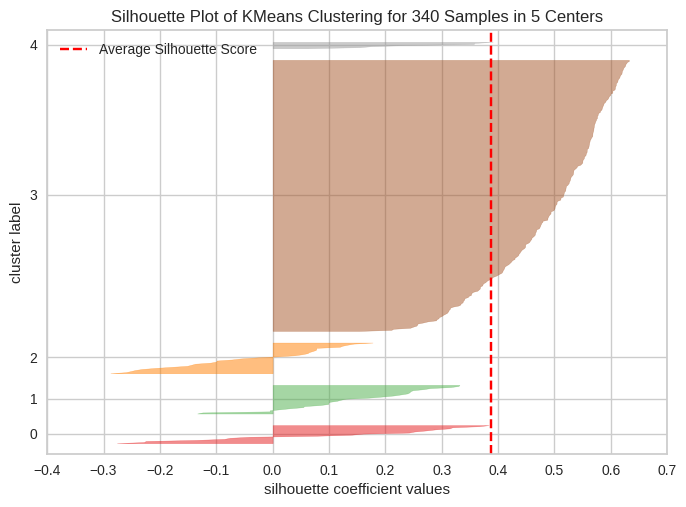

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(kmeans_subset_scaled_df)
visualizer.show()

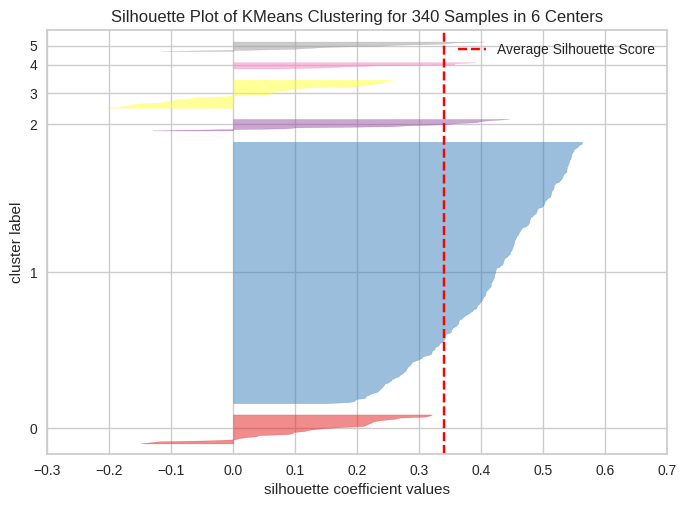

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(kmeans_subset_scaled_df)
visualizer.show()

Let's take k = 5 since the silhouette score is dropping after that.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(kmeans_subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [ ]:
k_means_df = final_df.copy()

In [ ]:
k_means_df["K_means_segments"] = kmeans.labels_
kmeans_subset_scaled_df["K_means_segments"] = kmeans.labels_

###Cluster Profiling

In [ ]:
cluster_profile = k_means_df.groupby("K_means_segments").mean(numeric_only=True)

In [ ]:
cluster_profile["count_in_each_segments"] = (
    k_means_df.groupby("K_means_segments")["GICS_Sector"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
for cl in k_means_df["K_means_segments"].unique():
    print("In cluster {}, the following sectors are present:".format(cl))
    print(k_means_df[k_means_df["K_means_segments"] == cl]["GICS_Sector"].unique())
    print()

In cluster 0, the following sectors are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']

In cluster 4, the following sectors are present:
['Information Technology' 'Health Care' 'Energy' 'Materials' 'Industrials'
 'Consumer Discretionary']

In cluster 3, the following sectors are present:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Real Estate' 'Materials']

In cluster 1, the following sectors are present:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Financials']

In cluster 2, the following sectors are present:
['Financials' 'Consumer Discretionary' 'Information Technology'
 'Health Care' 'Consumer Staples' 'Telecommunications Services' 'Energy']



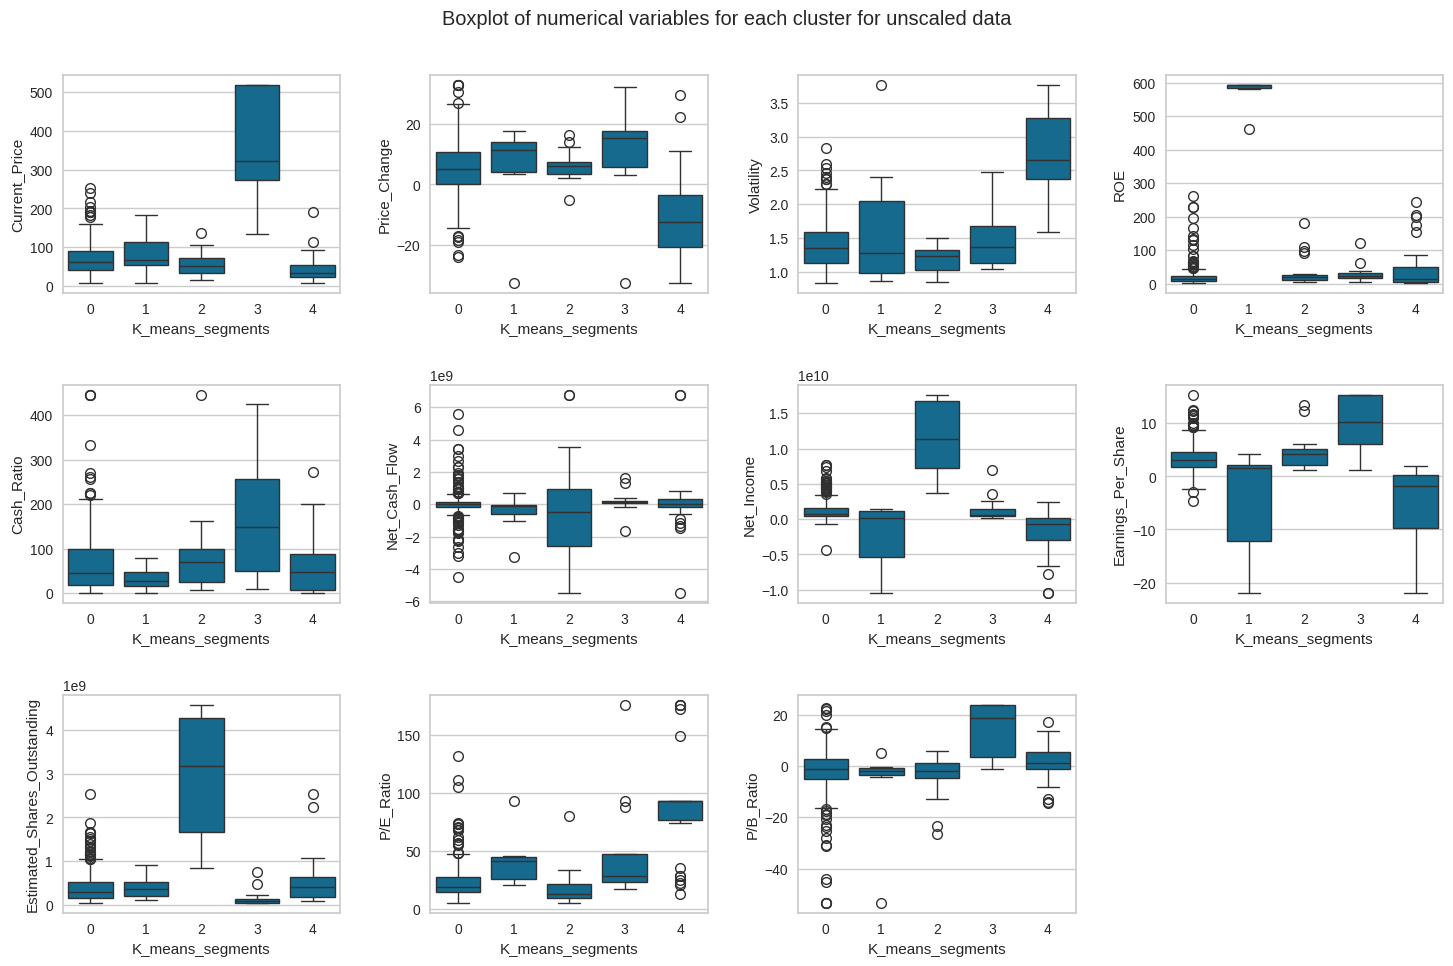

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster for unscaled data")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=k_means_df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

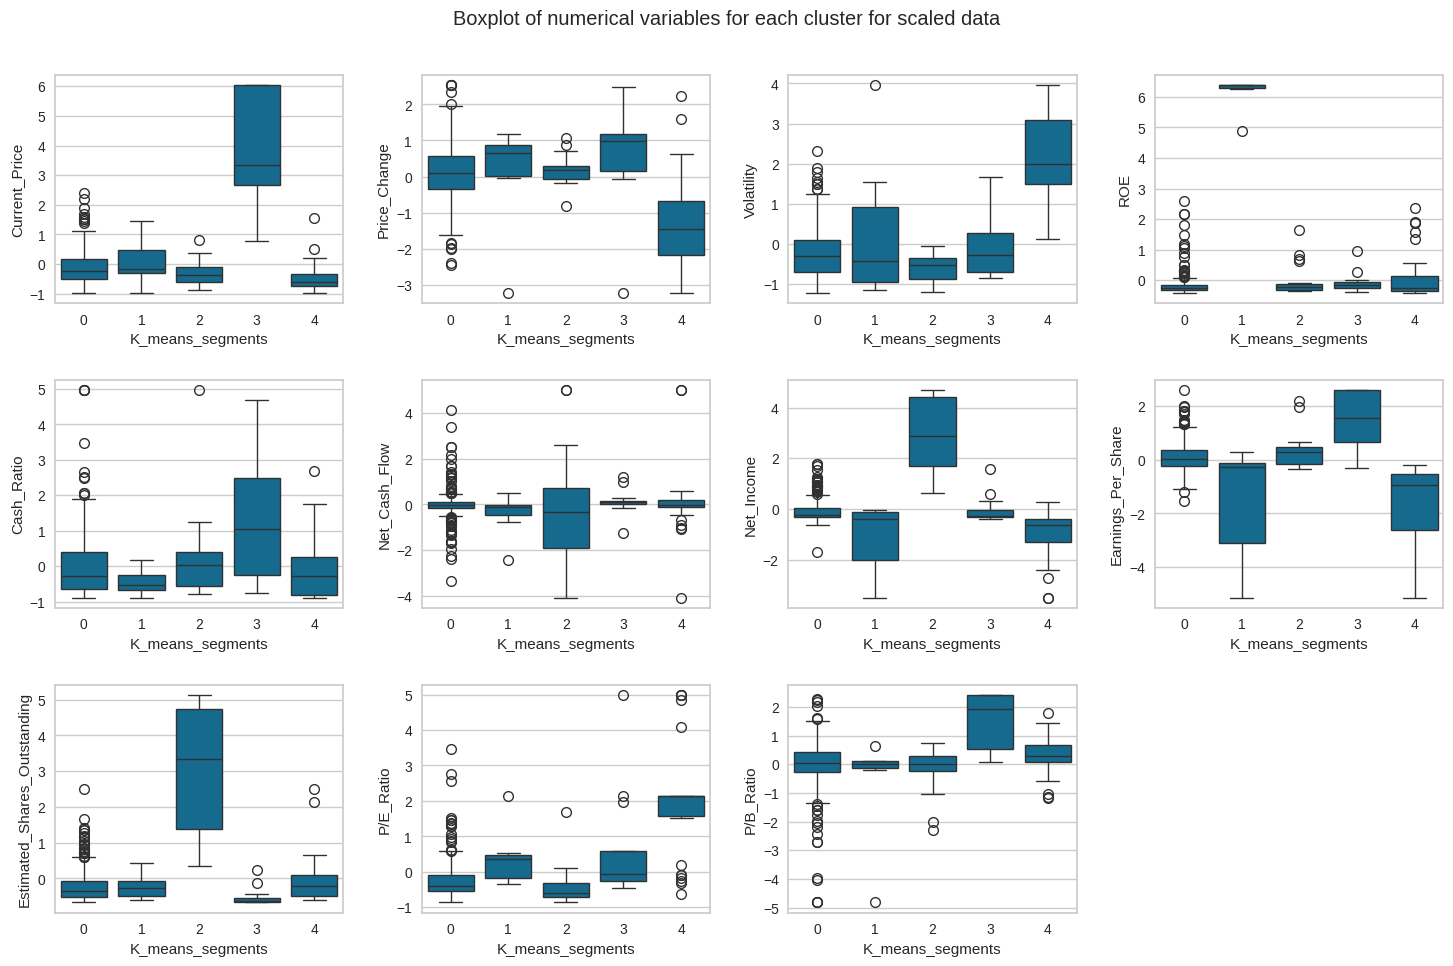

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster for scaled data")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=kmeans_subset_scaled_df, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

In [ ]:
pd.crosstab(k_means_df.K_means_segments, k_means_df.GICS_Sector).style.highlight_max(color="lightgreen", axis=0)

*   Cluster 0:
    *   It has moderate current_Price.
    *   Price_change is both is positive and negative.
    *   Volatality is moderate.
    *   Earnings_per_share is not very low.
    *   P/E_ratio is low.
*   Cluster 1:
    *   It has moderate current_Price.
    *   Price_change is positive.
    *   Volatality is low.
    *   Earnings_per_share is negative.
    *   P/E_ratio is moderate.
*   Cluster 2:
    *   It has low current_Price.
    *   Price_change is less but is positive.
    *   Volatality is low.
    *   Earnings_per_share is positive.
    *   P/E_ratio is low.
*   Cluster 3:
    *   It has high current_Price.
    *   Price_change is high.
    *   Volatality is moderate.
    *   Earnings_per_share is high.
    *   P/E_ratio is moderate.
*   Cluster 4:
    *   It has low current_Price.
    *   Price_change is in negative.
    *   Volatality is high.
    *   Earnings_per_share is very low.
    *   P/E_ratio is high.

## Hierarchical Clustering

In [ ]:
hierarchical_subset_scaled_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hierarchical_subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hierarchical_subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8971278890100828.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7806656690819611.
Cophenetic correlation for Euclidean distance and average linkage is 0.9139539550341494.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8512722656811862.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8926651148727601.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.705663303017319.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9024617554561276.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.824520724996218.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.890181856541293.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.76791957361653.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8847197457829182.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9139539550341494, which is obtained with Euclidean distance and average linkage.


In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hierarchical_subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hierarchical_subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8971278890100828.
Cophenetic correlation for complete linkage is 0.7806656690819611.
Cophenetic correlation for average linkage is 0.9139539550341494.
Cophenetic correlation for centroid linkage is 0.910921076042303.
Cophenetic correlation for ward linkage is 0.7393383488878658.
Cophenetic correlation for weighted linkage is 0.8512722656811862.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9139539550341494, which is obtained with average linkage.


In [ ]:
dendrogram(Z, ax=axs[i], truncate_mode='lastp')

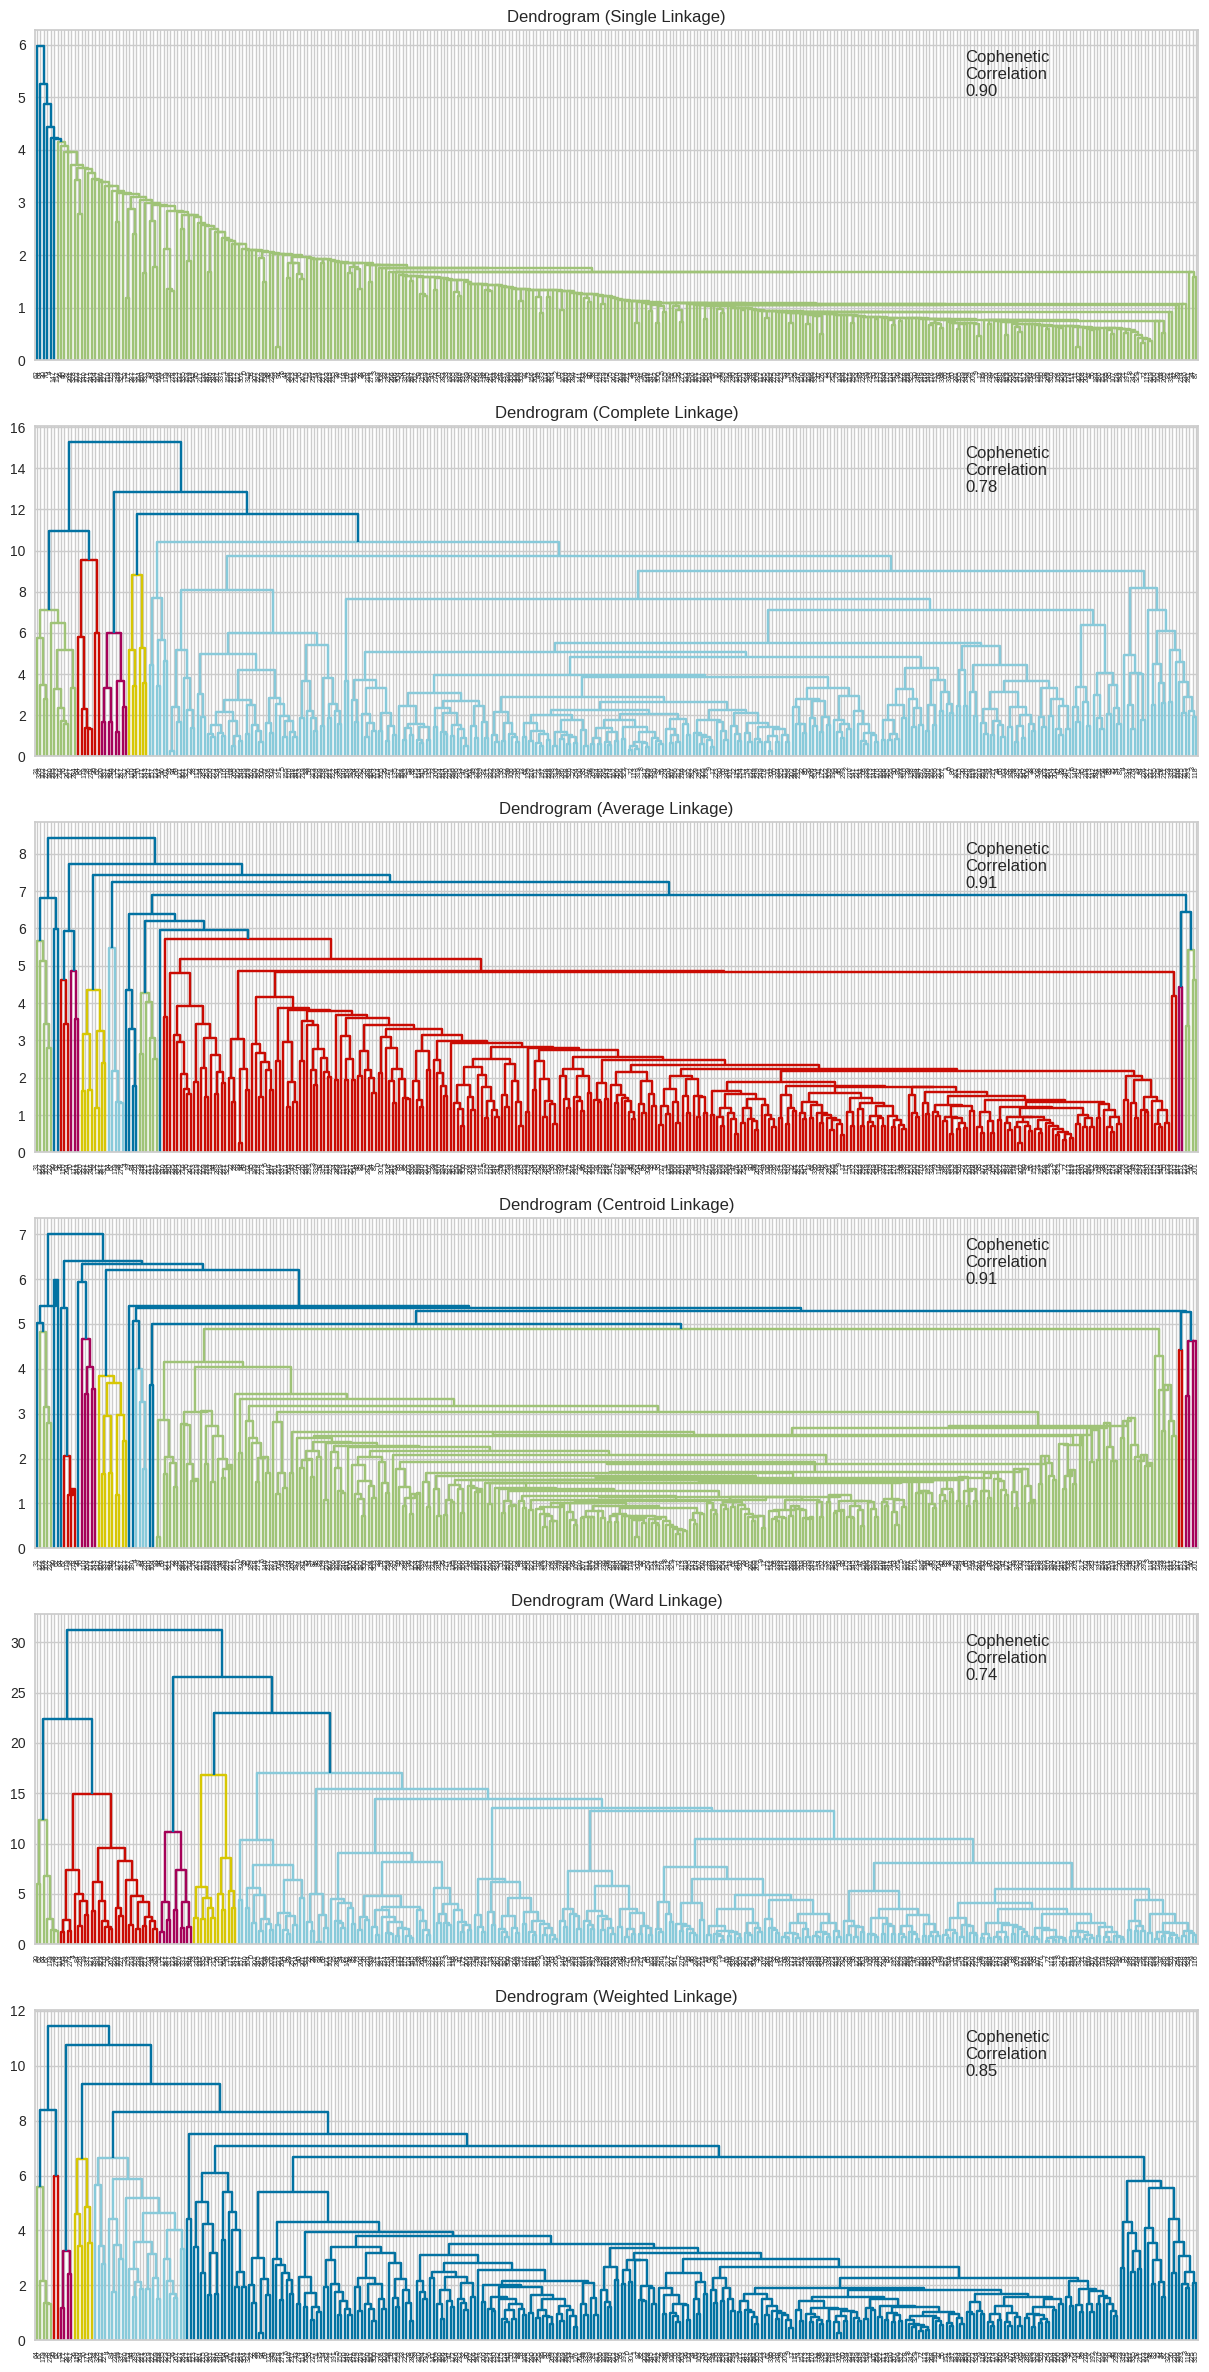

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hierarchical_subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])##, truncate_mode='lastp')
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hierarchical_subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

Linkage  Cophenetic Coefficient
0    single                0.897128
1  complete                0.780666
2   average                0.913954
3  centroid                0.910921
4      ward                0.739338
5  weighted                0.851272

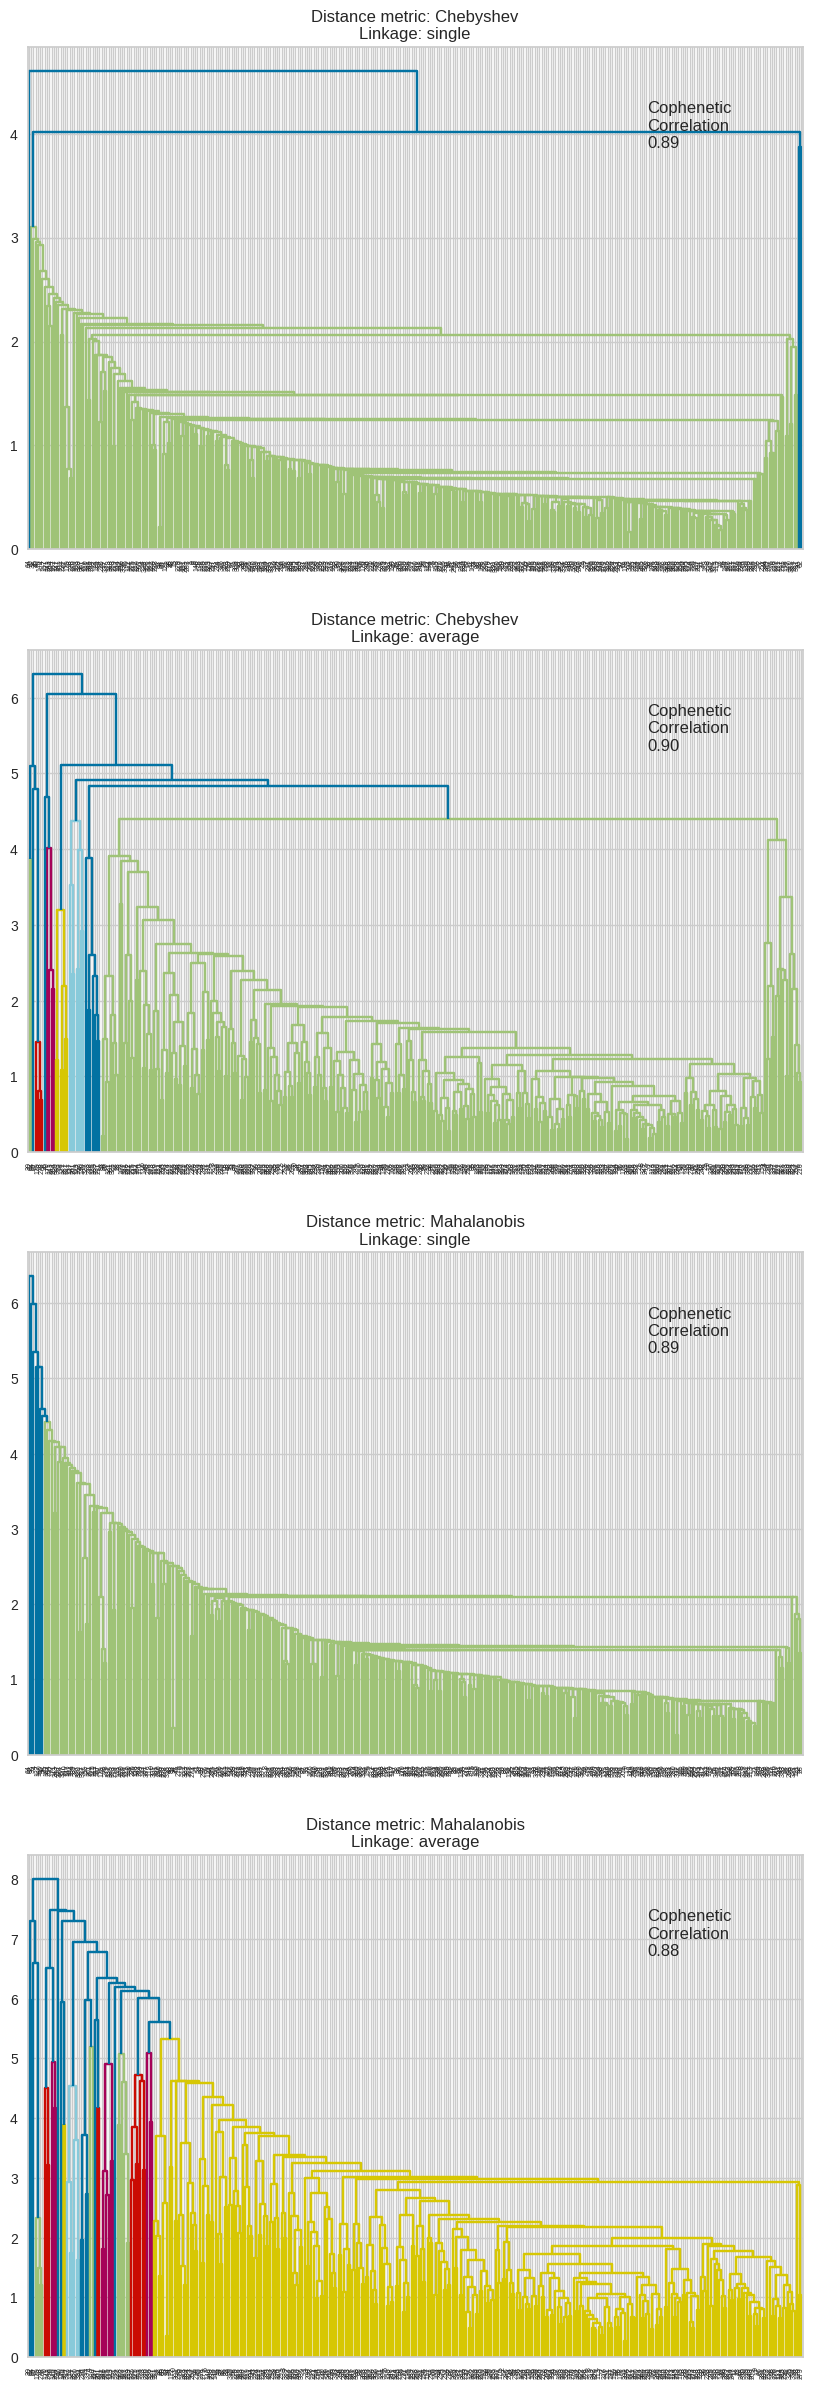

In [ ]:
# list of distance metrics
distance_metrics = ["chebyshev", "mahalanobis"]

# list of linkage methods
linkage_methods = ["single", "average"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hierarchical_subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(hierarchical_subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

These Dendograms are not very clear. So let us not use Chebyshev or Mahalanobis distance for calculation.
We can proceed with Euclidean distance with average Linkage since it has high Cophenetic Coefficient.

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(hierarchical_subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [ ]:
hierarchical_df = final_df.copy()

In [ ]:
hierarchical_subset_scaled_df["HC_Clusters"] = HCmodel.labels_
hierarchical_df["HC_Clusters"] = HCmodel.labels_

###Cluster Profiling

In [ ]:
cluster_profile = hierarchical_df.groupby("HC_Clusters").mean(numeric_only=True)

In [ ]:
cluster_profile["count_in_each_segments"] = (
    hierarchical_df.groupby("HC_Clusters")["GICS_Sector"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
for cl in hierarchical_df["HC_Clusters"].unique():
    print("In cluster {}, the following sectors are present:".format(cl))
    print(hierarchical_df[hierarchical_df["HC_Clusters"] == cl]["GICS_Sector"].unique())
    print()

In cluster 0, the following sectors are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 4, the following sectors are present:
['Industrials' 'Consumer Discretionary' 'Consumer Staples' 'Financials']

In cluster 2, the following sectors are present:
['Consumer Discretionary' 'Real Estate' 'Health Care']

In cluster 1, the following sectors are present:
['Energy' 'Materials']

In cluster 3, the following sectors are present:
['Financials' 'Consumer Staples' 'Health Care'
 'Telecommunications Services' 'Energy']



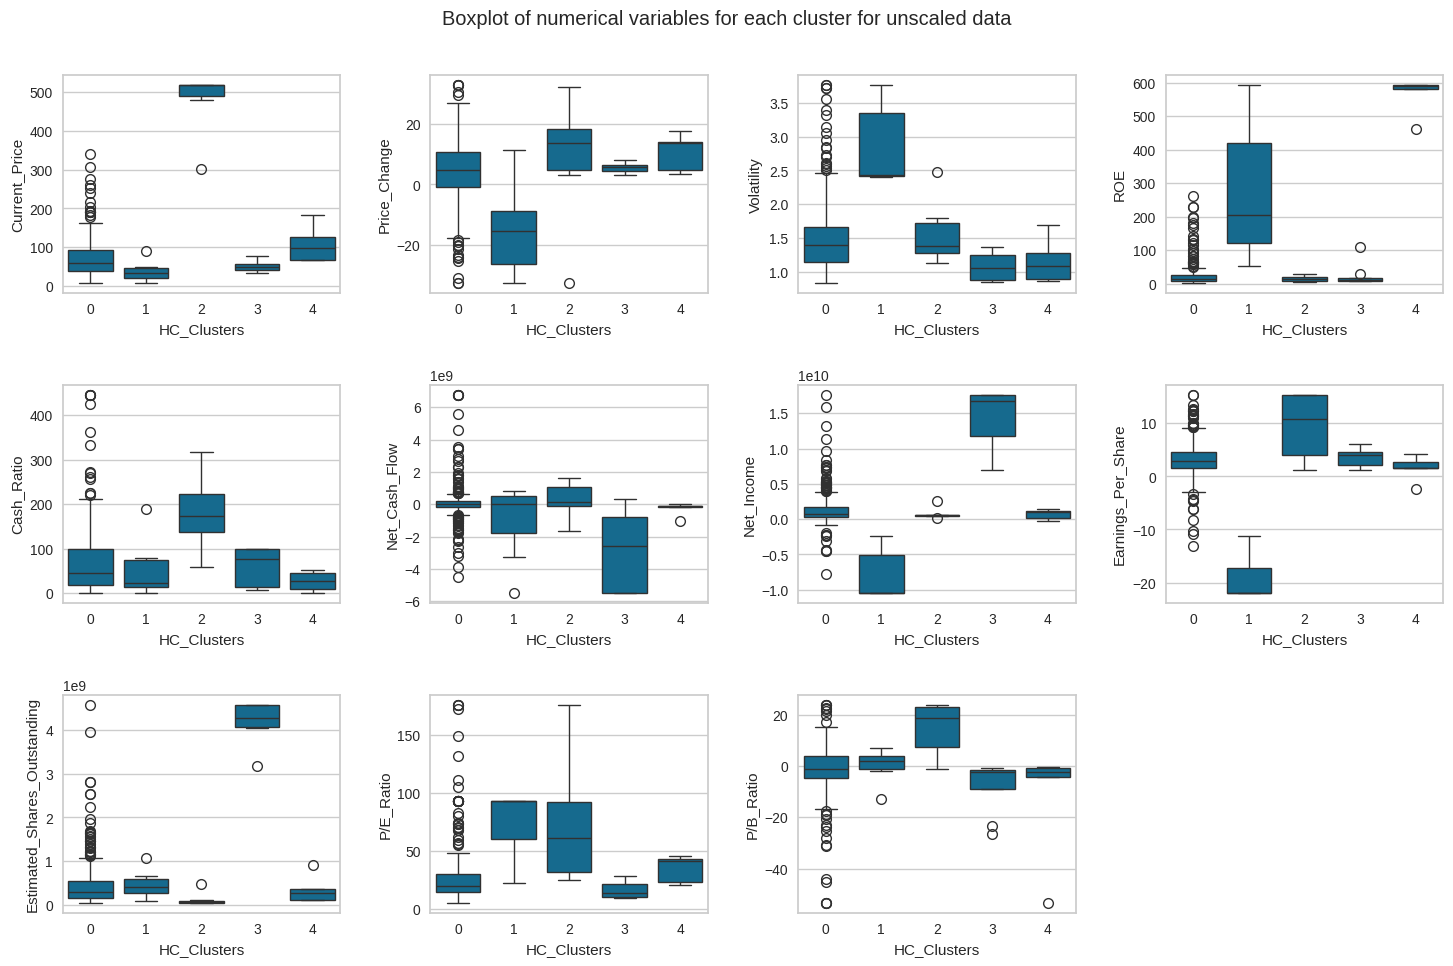

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster for unscaled data")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=hierarchical_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

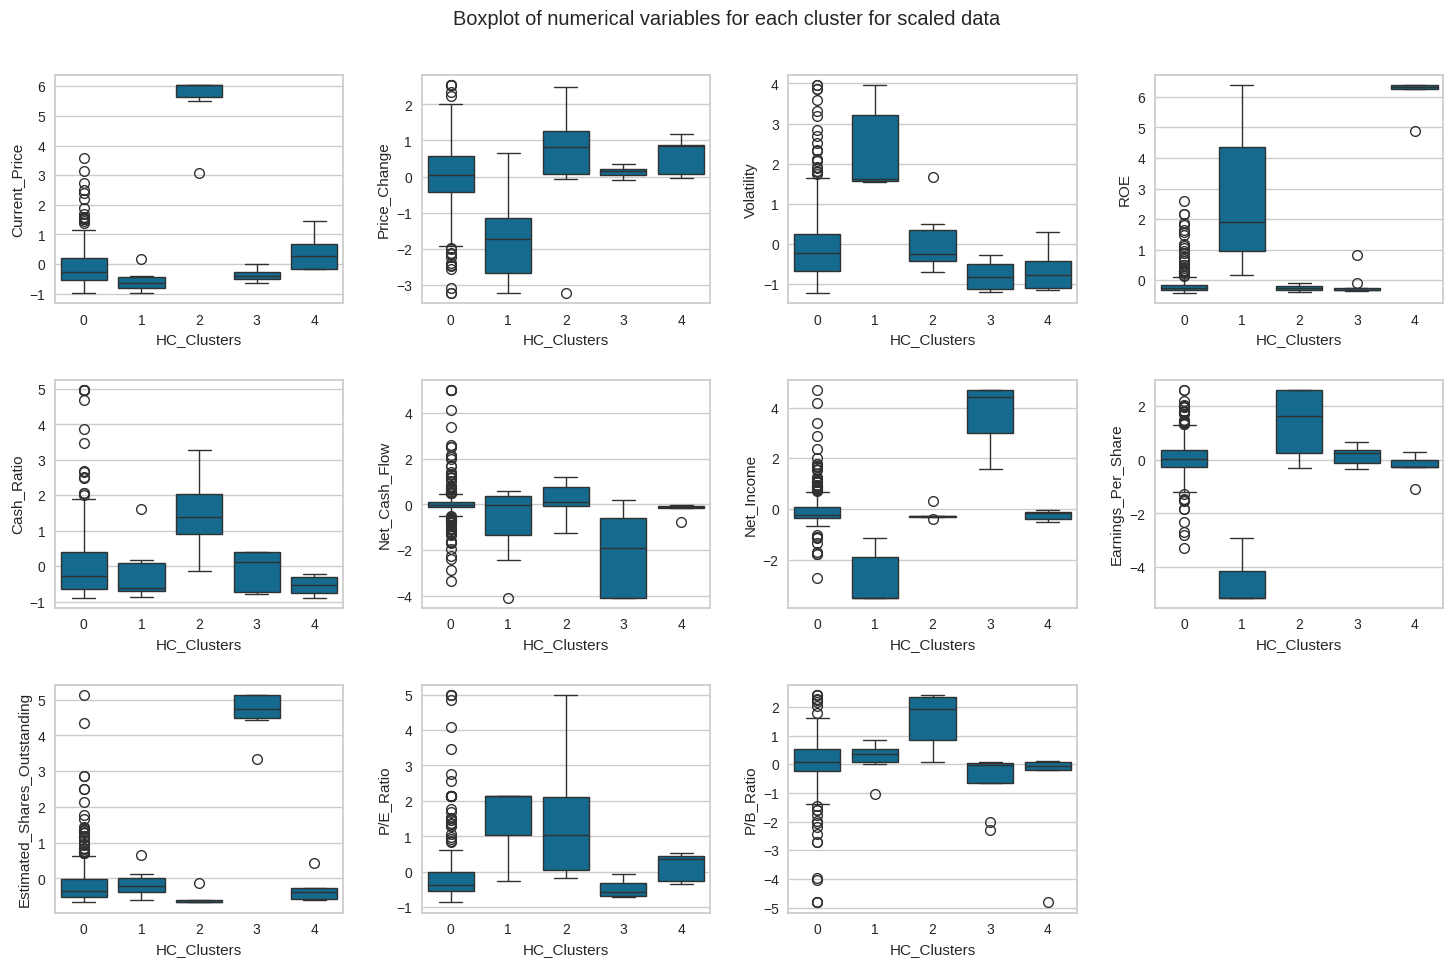

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster for scaled data")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=hierarchical_subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

In [ ]:
pd.crosstab(hierarchical_df.HC_Clusters, hierarchical_df.GICS_Sector).style.highlight_max(color="lightgreen", axis=0)

*   Cluster 0:
    *   It has moderate current_Price.
    *   Price_change is both is positive and negative.
    *   Volatality is moderate.
    *   Earnings_per_share is not very low.
    *   P/E_ratio is low.
*   Cluster 1:
    *   It has low current_Price.
    *   Price_change is negative.
    *   Volatality is high.
    *   Earnings_per_share is less.
    *   P/E_ratio is high.
*   Cluster 2:
    *   It has high current_Price.
    *   Price_change is positive.
    *   Volatality is moderate.
    *   Earnings_per_share is high.
    *   P/E_ratio is moderate.
*   Cluster 3:
    *   It has low current_Price.
    *   Price_change is low but is positive.
    *   Volatality is low.
    *   Earnings_per_share is moderate.
    *   P/E_ratio is low.
*   Cluster 4:
    *   It has moderate current_Price.
    *   Price_change is moderate.
    *   Volatality is low.
    *   Earnings_per_share is in negative.
    *   P/E_ratio is moderate.

## K-means vs Hierarchical Clustering

In [ ]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [ ]:
pca.explained_variance_ratio_.sum()

0.38352780904883543

<Axes: xlabel='Component 1', ylabel='Component 2'>

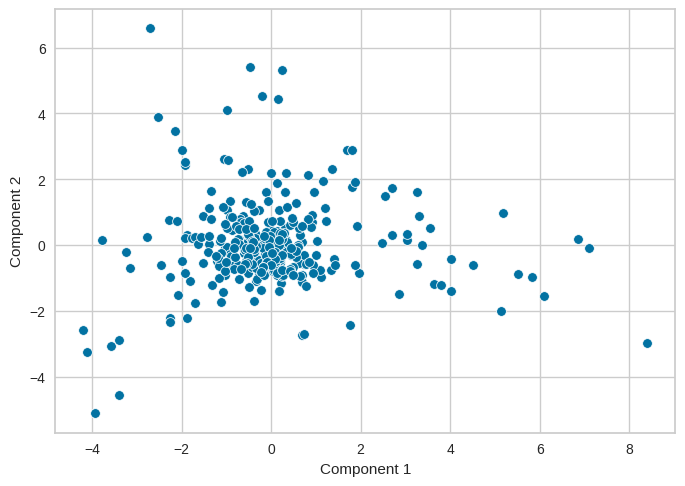

In [ ]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

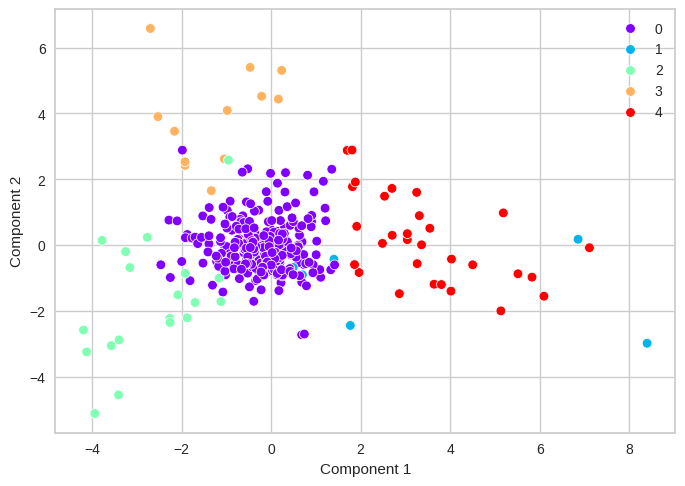

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=k_means_df['K_means_segments'],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

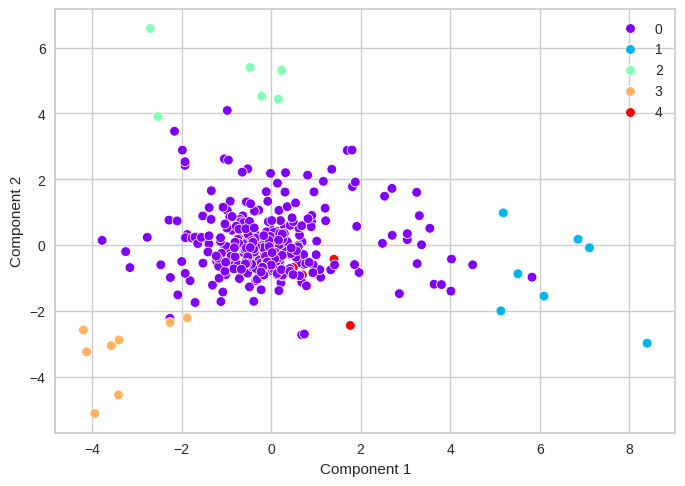

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=hierarchical_subset_scaled_df["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

*   Both the clustering techniques gave one big cluster and other clusters are just seem to be outliers.
*   K means clustering gave distinct clusters. It was easy to find all the 5 clusters. Hierarchical clustering gave good clusters but one cluster has 92% of the data.
*   Both the clustering techniques took almost the same time. But Hierarchical clustering took 1 sec less than K means.
*   Both the clustering techniques gave 5 different clusters.
*   The distribution of number of observations in the K means clusters are more than the number of observations in the Hierarchical clusters except for the main big cluster.
*   In K Means, when the component 1 value is between -2 and -4 and the component 2 value is between 0 and -4, then it belonged to one cluster(approx). But in Hierarchical, the component 1 value is between -2 and -4 and the component 2 value is between -2 and -4, then it belonged to one cluster(approx). So less observtions in Hierarchical cluster. Similarly for all other small clusters. Hence 92% of the observations are in cluster 0 for Hierarchical and 80% of observations are in Cluster 0 for K means.

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations



###Conclusion:

*   Using K Means:
    *   Cluster 0 has all the GICS_Sectors. It has moderate current_price, low volatality and low p/e_ratio. The earnings_per_share is both in the positive and negative range but the loss is not too much and the gain is also not too much.
    *   Cluster 2 has similar properties like cluster 0. Low current_price, low volatality, low p/e_ratio and good earnings_per_share. The estimated_outstanding_share is high which makes the shares low in price as there is no demand in buying the shares.
    *   Cluster 4 is poor performing cluster. It has shares from Energy Sector. Energy Sector shares have high volatality, high p/e ratio and Earnings_per_share is also is negative. Should avoid buying shares which belong to Energy Sector.
    *   Cluster 3 has Consumer Discretionary and Health Care sectors. It has high Current_price making it a premuim cluster. Volatality is moderate but the Earnings_per_share is high. These are good premium shares that if affordable we can buy.
    *   Shares to buy from Cluster 0, 2 and 3. Shares not to buy from Cluster 4.
*  Using Hierarchical:
    *   Cluster 0 has all the GICS_Sectors. It has moderate current_price, low volatality and low p/e_ratio. The earnings_per_share is both in the positive and negative range but the loss is not too much and the gain is also not too much.
    *   Cluster 3 has similar properties like cluster 0. Low current_price, low volatality, low p/e_ratio and good earnings_per_share. The estimated_outstanding_share is high which makes the shares low in price as there is no demand in buying the shares.
    *   Cluster 1 is poor performing cluster. It has shares from Energy Sector. Energy Sector shares have high volatality, high p/e ratio and Earnings_per_share is also is negative. Should avoid buying shares which belong to Energy Sector.
    *   Cluster 2 has Consumer Discretionary and Health Care sectors. It has high Current_price making it a premuim cluster. Volatality is moderate but the Earnings_per_share is high. These are good premium shares that if affordable we can buy.
    *   Shares to buy from Cluster 0, 2 and 3. Shares not to buy from Cluster 1.

###Recommendations:
*   Energy Sectors shares have high volatality and earnings_per_share is negtive. Should avoid buying shares from Energy sectors.
*   Consumer Discretionary and Health Care sectors shares are premium shares. High share prices and earnings_per_share is also high. It has moderate volatality but overall good shares to buy.
*   Financials an Utilities sector shares are also good shares. It has low volatality and the earnings_per_share is high and low p/e_ratio.
*   Industrials sector shares have high earnings_per_share, moderate volatality and low p/e_ratio. These are also good shares to buy.

In [ ]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/USL_Project_LearnerNotebook_FullCode+%282%29.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/USL_Project_LearnerNotebook_FullCode+%282%29.ipynb to html
[NbConvertApp] Writing 7149976 bytes to /content/drive/My Drive/Colab Notebooks/USL_Project_LearnerNotebook_FullCode+%282%29.html
